# Problem Set 5
### Jonas Katona
#### Math 228B
#### Professor Per-Olof Persson
**Note:** I used Julia 1.0.0 for this problem set.

## Problem 1

**Part (a)**

We desire to formulate a Galerkin method for the following boundary-value problem, also known as a 2-D Helmholtz problem for a given wavenumber *k* with normalized propagation velocity and Sommerfeld radiation condition at the in/out boundaries:

$$
-\nabla^{2}u-k^{2}u=0\quad in\hspace{0.25cm}\Omega,\quad(1)\\
\mathbf{n}\cdot\nabla{u}=0\quad on\hspace{0.25cm}\Gamma_{wall},\quad(2)\\
\mathbf{n}\cdot\nabla{u}+iku=0\quad on\hspace{0.25cm}\Gamma_{out},\quad(3)\\
\mathbf{n}\cdot\nabla{u}+iku=2ik\quad on\hspace{0.25cm}\Gamma_{in},\quad(4)
$$

where $\mathbf{n}$ is the unit normal vector to the indicated boundary and $\partial\Omega=\Gamma_{wall}\cup\Gamma_{out}\cup\Gamma_{in}$. Given an appropriate function space $V_{h}$ of piecewise continuous linear test functions, we multiply both sides of $(1)$ by some arbitrary member of this space, $v\in V_{h}$, and replace $u$ with $u_{h}$ to show that this is a numerical solution. 

$$
-v\nabla^{2}u_{h}-k^{2}vu_{h}=0\quad in\hspace{0.25cm}\Omega.\quad(5)
$$

We integrate both sides of $(5)$ over the two-dimensional domain that our PDE holds, $\Omega$, giving us that

$$
-\iint_{\Omega}{v\nabla^{2}u_{h}d^{2}\mathbf{x}}-k^{2}\iint_{\Omega}{vu_{h}d^{2}\mathbf{x}}=0\quad in\hspace{0.25cm}\Omega.\quad(6)
$$

Then, via Green's first identity, the first integral of $(6)$ is equal to

$$
\iint_{\Omega}{v\nabla^{2}u_{h}d^{2}\mathbf{x}}=\oint_{\partial\Omega}{v\nabla u_{h}\cdot\mathbf{n}ds}-\iint_{\Omega}{\left(\nabla u_{h}\right)\cdot\left(\nabla v\right)d^{2}\mathbf{x}},\quad(7)
$$

and substituting $(7)$ into $(6)$, we get

$$
\iint_{\Omega}{\left(\nabla u_{h}\right)\cdot\left(\nabla v\right)d^{2}\mathbf{x}}-\oint_{\partial\Omega}{v\nabla u_{h}\cdot\mathbf{n}ds}-k^{2}\iint_{\Omega}{vu_{h}d^{2}\mathbf{x}}=0\quad in\hspace{0.25cm}\Omega.\quad(8)
$$

Furthermore, since $\partial\Omega=\Gamma_{wall}\cup\Gamma_{out}\cup\Gamma_{in}$, the loop integral in $(8)$ can be further decomposed as follows:

$$
\oint_{\partial\Omega}{v\nabla u_{h}\cdot\mathbf{n}ds}=\int_{\Gamma_{wall}}{v\nabla u_{h}\cdot\mathbf{n}ds}+\int_{\Gamma_{out}}{v\nabla u_{h}\cdot\mathbf{n}ds}+\int_{\Gamma_{in}}{v\nabla u_{h}\cdot\mathbf{n}ds}.\quad(9)
$$


This is where we can apply the boundary conditions $(2)-(4)$. Plugging these into each integral for $(9)$, we get that

$$
\oint_{\partial\Omega}{v\nabla u_{h}\cdot\mathbf{n}ds}=-ik\int_{\Gamma_{out}}{vu_{h}ds}+ik\int_{\Gamma_{in}}{v\left(2-u_{h}\right)ds}=-ik\left(\int_{\Gamma_{in}}{vu_{h}ds}+\int_{\Gamma_{out}}{vu_{h}ds}\right)+2ik\int_{\Gamma_{in}}{vds}.\quad(10)
$$

Hence, substituting $(10)$ into $(8)$, we derive our Galerkin finite element formulation for an appropriate function space $V_{h}$.

$$
\boxed{\iint_{\Omega}{\left(\nabla u_{h}\right)\cdot\left(\nabla v\right)d^{2}\mathbf{x}}+ik\left(\int_{\Gamma_{in}}{vu_{h}ds}+\int_{\Gamma_{out}}{vu_{h}ds}\right)-k^{2}\iint_{\Omega}{vu_{h}d^{2}\mathbf{x}}=2ik\int_{\Gamma_{in}}{vds}\quad in\hspace{0.25cm}\Omega.}\quad(11)
$$

(Note that these dot products are for *possibly* complex vectors, which is crucial in the next section.) $\boxed{}$

**Part (b)**

Suppose that we now have a basis $\left\{\varphi_{i}\right\},\hspace{0.15cm}i=1,\dots,n$ of piecewise linear functions for our function space $V_{h}$. We now write our numerical solution $u_{h}$ as a linear combination of elements in our basis: $u_{h}=\sum_{j}{u_{h,j}\varphi_{j}}$, for coefficients $u_{h,j}\in\mathbb{C}$. Also, let our test function $v$ be an element in our basis, such that $v=\varphi_{i}$. Then, $(11)$ becomes

$$
\iint_{\Omega}{\left(\nabla\sum_{j}{u_{h,j}\varphi_{j}}\right)\cdot\left(\nabla \varphi_{i}\right)d^{2}\mathbf{x}}+ik\left(\int_{\Gamma_{in}}{\varphi_{i}\sum_{j}{u_{h,j}\varphi_{j}}ds}+\int_{\Gamma_{out}}{\varphi_{i}\sum_{j}{u_{h,j}\varphi_{j}}ds}\right)-k^{2}\iint_{\Omega}{\varphi_{i}\sum_{j}{u_{h,j}\varphi_{j}}d^{2}\mathbf{x}}=2ik\int_{\Gamma_{in}}{\varphi_{i}ds}\quad in\hspace{0.25cm}\Omega,
$$

and switching the sum and integral in all cases (which we can do, if we assume that our numerical scheme converges),

$$
\sum_{j}{u_{h,j}\iint_{\Omega}{\left(\nabla\varphi_{j}\right)\cdot\left(\nabla \varphi_{i}\right)d^{2}\mathbf{x}}}+ik\sum_{j}{u_{h,j}\left(\int_{\Gamma_{in}}{\varphi_{i}\varphi_{j}ds}+\int_{\Gamma_{out}}{\varphi_{i}\varphi_{j}ds}\right)}-k^{2}\sum_{j}{u_{h,j}\iint_{\Omega}{\varphi_{i}\varphi_{j}d^{2}\mathbf{x}}}=2ik\int_{\Gamma_{in}}{\varphi_{i}ds}\quad in\hspace{0.25cm}\Omega\\
\Rightarrow\sum_{j}{u_{h,j}\left[\iint_{\Omega}{\left(\nabla\varphi_{i}\right)\cdot\left(\nabla \varphi_{j}\right)d^{2}\mathbf{x}}+ik\left(\int_{\Gamma_{in}}{\varphi_{i}\varphi_{j}ds}+\int_{\Gamma_{out}}{\varphi_{i}\varphi_{j}ds}\right)-k^{2}\iint_{\Omega}{\varphi_{i}\varphi_{j}d^{2}\mathbf{x}}\right]}=2ik\int_{\Gamma_{in}}{\varphi_{i}ds}\quad in\hspace{0.25cm}\Omega.\quad(12)
$$

We readily see that $(12)$ can be reformulated in the form of a matrix equation of the form $A\mathbf{u}=\mathbf{b}$, since we have a sum multiplying elements of $\mathbf{u}=\left(u_{1},\dots,u_{n}\right)$ by the elements in each $i$th row vector of an $n\times n$ matrix $A$ (which will also turn out to be *symmetric*). Namely,

$$
\mathbf{u}=\begin{bmatrix} u_{1} \\ \vdots \\ u_{n} \end{bmatrix},\quad\mathbf{b}=2ik\mathbf{b}_{in},\quad\mathbf{b}_{in}=\begin{bmatrix}\int_{\Gamma_{in}}{\varphi_{1}ds} \\ \vdots \\ \int_{\Gamma_{in}}{\varphi_{n}ds} \end{bmatrix},\quad[A]_{ij}=[K]_{ij}-k^{2}[M]_{ij}+ik\left([B_{in}]_{ij}+[B_{out}]_{ij}\right),\quad(13)
$$

where

$$
[K]_{ij}=[K]_{ji}=\iint_{\Omega}{\left(\nabla\varphi_{i}\right)\cdot\left(\nabla \varphi_{j}\right)d^{2}\mathbf{x}}\quad(14),\quad[M]_{ij}=[M]_{ji}=\iint_{\Omega}{\varphi_{i}\varphi_{j}d^{2}\mathbf{x}}\quad(15),\quad[B_{in}]_{ij}=[B_{in}]_{ji}=\int_{\Gamma_{in}}{\varphi_{i}\varphi_{j}ds}\quad(16),
$$

and

$$
[B_{out}]_{ij}=[B_{out}]_{ji}=\int_{\Gamma_{out}}{\varphi_{i}\varphi_{j}ds}.\quad(17)
$$

Also, since we observe that $K$, $M$, $B_{in}$, and $B_{out}$ are symmetric, it follows that $A$ is also symmetric, since it can be written as a linear combination of these symmetric matrices. Furthermore, since our linear functions in $V_{h}$ are all real, each of these matrices excluding $A$ are real. ($A$ has, in general, complex entries, because $B_{in}$ and $B_{out}$ are both multiplied by $ik$.) Nevertheless, because of these properties, all of these matrices *including* $A$ are Hermitian (i.e. self-adjoint). Therefore, by the spectral theorem, $A$ has all *real* eigenvalues, which implies that there exists a basis for $V_{h}$ consisting of functions that are real. This will be crucial for part (c). $\boxed{}$

**Part (c)**

The transmitted intensity at the output boundaries is analytically given as $H(u)=\oint_{\Gamma_{out}}{\left|u\right|^{2}ds}$. However, since we will have a numerical solution, we replace $u$ with $u_{h}$, giving us a numerical intensity of 

$$
H\left(u_{h}\right)=\int_{\Gamma_{out}}{\left|u_{h}\right|^{2}ds}=\int_{\Gamma_{out}}{u_{h}^{*}u_{h}ds},\quad(18)
$$ 

where $\left(\cdot\right)^{*}$ is the Hermitian (conjugate) transpose operator. From here, we can write $u_{h}$ as a linear combinatinon of basis functions in $V_{h}$, such that $(18)$ becomes

$$
H\left(u_{h}\right)=\int_{\Gamma_{out}}{\left(\sum_{j}{u_{h,j}\varphi_{j}}\right)^{*}\left(\sum_{j}{u_{h,j}\varphi_{j}}\right)ds}=\int_{\Gamma_{out}}{\left(\sum_{i}{u_{h,i}^{*}\varphi_{i}^{*}}\right)\left(\sum_{j}{u_{h,j}\varphi_{j}}\right)ds},
$$

and switching the sum and integral as before, we get that

$$
H\left(u_{h}\right)=\sum_{i}{\sum_{j}{u_{h,i}^{*}}\left(\int_{\Gamma_{out}}{\varphi_{i}^{*}\varphi_{j}ds}\right)u_{h,j}}.\quad(19)
$$

Finally, as deduced earlier, since $A$ is Hermitian, there exists a piecewise linear basis for $V_{h}$ consisting of real functions. Therefore, if we choose such a basis, $\varphi_{i}^{*}=\varphi_{i}$, which means that $(19)$ becomes

$$
H\left(u_{h}\right)=\sum_{i}{\sum_{j}{u_{h,i}^{*}}\left(\int_{\Gamma_{out}}{\varphi_{i}\varphi_{j}ds}\right)u_{h,j}},
$$

and by $(17)$,

$$
\boxed{H\left(u_{h}\right)=\sum_{i}{\sum_{j}{u_{h,i}^{*}}[B_{out}]_{ij}u_{h,j}}=\mathbf{u}^{*}B_{out}\mathbf{u}.}\quad(20)
$$

Furthermore, as derived in part (b), $B_{out}$ is a real symmetric matrix, so $[B_{out}]_{ij}=[B_{out}]_{ji}^{*}$. Therefore, $\left(\mathbf{u}^{*}B_{out}\mathbf{u}\right)^{*}=\left([u]_{i}^{*}[B_{out}]_{ij}[u]_{j}\right)^{*}=[u]_{j}^{*}[B_{out}]_{ji}^{*}\left([u]_{i}^{*}\right)^{*}=[u]_{j}^{*}[B_{out}]_{ji}^{*}[u]_{i}=[u]_{i}^{*}[B_{out}]_{ij}[u]_{j}=\mathbf{u}^{*}B_{out}\mathbf{u}$, so we deduce that the transmitted intensity is *real*, which is what we would physically expect. This demonstrates that our numerical results are physically relevant. $\boxed{}$

## Problem 2

**Part (a)**

Consider a model test boundary value problem (BVP) satisfying $(1)-(4)$, where $k=6$ and

$$
\Omega=\left\{0\leq x\leq 5,\quad 0\leq y\leq 1\right\},\quad(21)\\
\Gamma_{in}=\left\{x=0,\quad 0\leq y\leq 1\right\},\quad(22)\\
\Gamma_{out}=\left\{x=5,\quad 0\leq y\leq 1\right\},\quad(23)\\
\Gamma_{wall}=\left\{0\leq x\leq 5,\quad y=0\quad or\quad y=1\right\},\quad(24)
$$

which physically represents a straight channel domain with dimensions $5\times 1$. We need to show that $u_{exact}\left(x,y\right)=e^{-ikx}$ satisfies the BVP given by $(1)-(4)$, $(21)-(24)$ (which we will come to find will satisfy this BVP regardless of our value of $k$). We note that the unit normal vectors to the given boundaries are

$$
\mathbf{n}_{in}=<-1,0>\quad(25),\quad\mathbf{n}_{out}=<1,0>\quad(26),\quad\mathbf{n}_{wall,y=0}=<0,-1>\quad(27),\quad\mathbf{n}_{wall,y=1}=<0,1>.\quad(28)
$$

We start by checking that $u\left(x,y\right)=e^{-ikx}$ satisfies $(1)$. 

$$
\nabla u=\left<\frac{\partial u}{\partial x},\frac{\partial u}{\partial y}\right>=\left<\frac{\partial e^{-ikx}}{\partial x},\frac{\partial e^{-ikx}}{\partial y}\right>=-ik\left<e^{-ikx},0\right>\quad(29)\Rightarrow\nabla^{2} u=-ik\left(-ike^{-ikx}\right)=-k^{2}e^{-ikx}.
\Rightarrow \therefore-\nabla^{2} u-k^{2}u=k^{2}e^{-ikx}-k^{2}e^{-ikx}=0.
$$

Using $(29)$, we also calculate

$$
\nabla u\cdot\mathbf{n}_{in}=-ik\left<e^{-ikx},0\right>\cdot<-1,0>=-ik\left[\left(e^{-ikx}\right)(-1)+(0)(0)\right]=ike^{-ikx}=iku,\quad(30)\\
\nabla u\cdot\mathbf{n}_{out}=-ik\left<e^{-ikx},0\right>\cdot<1,0>=-ik\left[\left(e^{-ikx}\right)(1)+(0)(0)\right]=-ike^{-ikx}=-iku,\Rightarrow\nabla u\cdot\mathbf{n}_{out}+iku=0\quad(31)\\
\nabla u\cdot\mathbf{n}_{wall,y=0}=-ik\left<e^{-ikx},0\right>\cdot<0,-1>=-ik\left[\left(e^{-ikx}\right)(0)+(0)(-1)\right]=0,\quad(32)\\
\nabla u\cdot\mathbf{n}_{wall,y=1}=-ik\left<e^{-ikx},0\right>\cdot<0,1>=-ik\left[\left(e^{-ikx}\right)(0)+(0)(1)\right]=0.\quad(33)\\
$$

$(31)-(33)$ imply boundary conditions $(2)$ and $(3)$ immediately. Furthermore, $(30)$ implies $(4)$ as well, because when evaluated at $x=0$ (so, along $\Gamma_{in}$),

$$
\left.\nabla u\cdot\mathbf{n}_{in}\right|_{x=0}=\left.ike^{-ikx}\right|_{x=0}=ik\Rightarrow\mathbf{n}\cdot\nabla{u}+iku=ik+ik=2ik\quad on\hspace{0.25cm}\Gamma_{in},
$$

and hence, we have shown that $(4)$ also holds for $u\left(x,y\right)=e^{-ikx}$, as desired. $\boxed{}$

**Part (b)**

As in problem set 4, we start by calling in and defining various mesh utility functions, as supplied by Professor Per-Olof Persson and the GSI, Frank (Jingyi) Wang. These will be essential in defining functions for the rest of this problem set relating to triangular mesh generation, on which we will use finite element methods.

In [1]:
# Various mesh utilities, mostly for unstructured triangular meshes
#
# UC Berkeley Math 228B, Per-Olof Persson <persson@berkeley.edu>

using PyPlot, PyCall
using LinearAlgebra

"""
    t = delaunay(p)

Delaunay triangulation `t` of N x 2 node array `p`.
"""
function delaunay(p)
    tri = pyimport("matplotlib.tri")
    t = tri[:Triangulation](p[:,1], p[:,2])
    return Int64.(t[:triangles] .+ 1)
end

"""
    edges, boundary_indices, emap = all_edges(t)

Find all unique edges in the triangulation `t` (ne x 2 array)
Second output is indices to the boundary edges.
Third output emap (nt x 3 array) is a mapping from local triangle edges
to the global edge list, i.e., emap[it,k] is the global edge number
for local edge k (1,2,3) in triangle it.
"""
function all_edges(t)
    etag = vcat(t[:,[1,2]], t[:,[2,3]], t[:,[3,1]])
    etag = hcat(sort(etag, dims=2), 1:3*size(t,1))
    etag = sortslices(etag, dims=1)
    dup = all(etag[2:end,1:2] - etag[1:end-1,1:2] .== 0, dims=2)[:]
    keep = .![false;dup]
    edges = etag[keep,1:2]
    emap = cumsum(keep)
    invpermute!(emap, etag[:,3])
    emap = reshape(emap,:,3)
    dup = [dup;false]
    dup = dup[keep]
    bndix = findall(.!dup)
    return edges, bndix, emap
end
"""
    e = boundary_nodes(t)

Find all boundary nodes in the triangulation `t`.
"""
function boundary_nodes(t)
    edges, boundary_indices = all_edges(t)
    return unique(edges[boundary_indices,:][:])
end

"""
    tplot(p, t, u=nothing)

If `u` == nothing: Plot triangular mesh with nodes `p` and triangles `t`.
If `u` == solution vector: Plot filled contour color plot of solution `u`.
"""
function tplot(p, t, u=nothing)
    clf()
    axis("equal")
    if u == nothing
        tripcolor(p[:,1], p[:,2], t .- 1, 0*t[:,1],
                  cmap="Set3", edgecolors="k", linewidth=1)
    else
        tricontourf(p[:,1], p[:,2], t .- 1, u, 20)
    end
    draw()
end

"""
    inside = inpolygon(p, pv)

Determine if each point in the N x 2 node array `p` is inside the polygon
described by the NE x 2 node array `pv`.
"""
function inpolygon(p::Array{Float64,2}, pv::Array{Float64,2})
    path = pyimport("matplotlib.path")
    poly = path[:Path](pv)
    inside = [poly[:contains_point](p[ip,:]) for ip = 1:size(p,1)]
end

function test_inpolygon()
    pv = Float64[0 0; 1 0; 1 1; 0 1; 0.5 0.6; 0 0]
    x = collect(-.15:0.1:1.15)
    p = [x 0*x.+0.5]
    inside = inpolygon(p, pv)
    clf()
    plot(pv[:,1], pv[:,2],
         p[inside,1], p[inside,2], "*",
         p[.!inside,1], p[.!inside,2], "o")
    return
end

# Delaunay refinement mesh generator.
#
# UC Berkeley Math 228B, Per-Olof Persson <persson@berkeley.edu>

function remove_outside_tris(p, t, pv)
    pmid = dropdims(sum(p[t,:], dims=2), dims=2) / 3
    is_inside = inpolygon(pmid, pv)
    t = t[is_inside,:]
end

function triarea(p, t)
    d12 = @. p[t[:,2],:] - p[t[:,1],:]
    d13 = @. p[t[:,3],:] - p[t[:,1],:]
    @. abs(d12[:,1] * d13[:,2] - d12[:,2] * d13[:,1]) / 2
end

function remove_tiny_tris(p, t)
    t = t[triarea(p,t) .> 1e-14,:]
end

function circumcenter(p)
    dp1 = @. p[2,:] - p[1,:]
    dp2 = @. p[3,:] - p[1,:]

    mid1 = @. (p[1,:] + p[2,:]) / 2
    mid2 = @. (p[1,:] + p[3,:]) / 2

    s = [ -dp1[2] dp2[2]; dp1[1] -dp2[1]] \ (-mid1 .+ mid2)
    pc = @. mid1' + s[1] * [-dp1[2] dp1[1]]
end

function edge_midpoints(p, t)
    pmid = reshape(p[t,:] + p[t[:,[2,3,1]],:], :, 2) / 2
    pmid = unique(pmid, dims=1)
end

function pmesh(pv, hmax, nref)
    p = zeros(Float64, 0, 2)
    for i = 1:size(pv,1) - 1
        pp = pv[i:i+1,:]
        L = sqrt(sum(diff(pp, dims=1).^2, dims=2))[1]
        if L > hmax
            n = ceil(Int, L / hmax)
            ss = (0:n) / n
            pp = [1 .- ss ss] * pp
        end
        p = [p; pp[1:end-1,:]]
    end

    t = zeros(Int64, 0, 3)
    while true
        t = delaunay(p)
        t = remove_tiny_tris(p, t)
        t = remove_outside_tris(p, t, pv)
        # tplot(p,t), pause(1e-3)
        
        area = triarea(p, t)
        maxarea, ix = findmax(area)
        if maxarea < hmax^2 / 2
            break
        end
        pc = circumcenter(p[t[ix,:],:])
        p = [p; pc]
    end

    for iref = 1:nref
        p = [p; edge_midpoints(p, t)]
        t = delaunay(p)
        t = remove_tiny_tris(p, t)
        t = remove_outside_tris(p, t, pv)
        # tplot(p, t), pause(1e-3)
    end
    
    e = boundary_nodes(t)
    p, t, e
end

function pmesh_test()
    pv = [0 0; 1 0; .5 .5; 1 1; 0 1; 0 0]
    p,t,e = pmesh(pv, 0.2, 1);
    tplot(p,t)
end

pmesh_test (generic function with 1 method)

Next, we define the `waveguide_edges` function, which will take in our list of nodes `p` in spatial coordinates (i.e. each row will correspond to a coordinate pair $(x,y)$ for each node), and a triangulation `t`, for which each row will correspond to a triangle in our mesh. Namely, each row of `t` contains the indices of the rows in `p` that give the spatial coordinates for the vertices of each triangle. It returns the edges of our triangular mesh domain that correspond to $\Gamma_{in}$, $\Gamma_{out}$, and $\Gamma_{wall}$, which will be defined in our code as `ein`, `eout`, and `ewall`, respectively. Note that each of these is an $n\times 2$ array, where each row $i$ corresponds to the vertices for the two nodes that make up each $ith$ edge.

To find `ein`, `eout`, and `ewall`, we start off by looping through each of the edges in `edges`, which gives all of the edges in our triangulation. We extract the spatial coordinates $(x,y)$ corresponding to the two nodes that make up this edge. From here, we can check if the edge lies on $\Gamma_{in}$, $\Gamma_{out}$, $\Gamma_{wall}$, or none, in which case the edge lies in the interior of $\Omega$. For $\Gamma_{in}$, *both* of the $x$-coordinates of the edge must be equal to $0$, for $\Gamma_{out}$, *both* of these must be equal to $5$, and for $\Gamma_{wall}$, *both* of the $y$-coordinates must be either 0 or 1.

Also, we note that, as usual, I will add comments in my code which explain in detail what each step of the code does.

In [2]:
function waveguide_edges(p, t) 
    #extract edges (`edges` is all we need) for `t` using `all_edges` 
    edges, boundary_indices, emap = all_edges(t)
    #this code can work on any arbitrary waveguide channel, where \Gamma_{in}
    #starts at x=0. \Gamma_{out} will be at x=`M`, with `M` defined as below.
    #In our case, `M`=5
    M = maximum(p[:, 1])
    #loop through each of these edges in our triangulation `t`
    N = length(edges[:, 1])
    for i = 1 : N
        indices = reshape(edges[i, :], (1, 2)) #get indices for given edge
        x1 = p[indices[1], 1] #get x-coordinate for the first node
        x2 = p[indices[2], 1] #get x-coordinate for the second node
        y1 = p[indices[1], 2] #get y-coordinate for the first node
        y2 = p[indices[2], 2] #get y-coordinate for the second node
        #define `ein`, `eout`, and `ewall` on our first loop
        #these will be used to store edges that lie on the boundary 
        if i == 1 
            ein = [0 0]
            eout = [0 0]
            ewall = [0 0]
        end
        if x1 == x2 == 0.0 #if the edge lies on \Gamma_{in}, add to `ein`
            ein = vcat(ein, indices) #concatenate edge to cumulative edge array
        elseif x1 == x2 == M #if the edge lies on \Gamma_{out}, add to `eout`
            eout = vcat(eout, indices) #concatenate edge to cumulative edge array
        elseif y1 == y2 == 0.0 || y1 == y2 == 1.0
            #if the edge lies on \Gamma_{wall}, add to `ewall`
            ewall = vcat(ewall, indices) #concatenate edge to cumulative edge array
        end
    end
    #remove the first rows of `ein`, `eout`, and `ewall`, because 
    #these were just set so that we could concatenate the edges
    ein = ein[2 : end, :]
    eout = eout[2 : end, :]
    ewall = ewall[2 : end, :]
    return ein, eout, ewall
end

waveguide_edges (generic function with 1 method)

**Part (c)**

This code is too long to explain adequately without referring more specifically to what each part of the code does, but I will to my best (and supplement with comments, of course). We start by preallocating the necessary arrays `K`, `M`, `Bin`, `Bout`, and `bin`, as well as the length that our solution vector `u` will be. These are all as defined in problem 1. We also define the standard basis vectors in $\mathbb{R}^{3}$, which will be used to solve for the coefficients of our local linear basis functions on each triangular mesh element.

Next, we loop through each triangle in our mesh, which are all contained in `t`. For each of these triangular elements, we calculate the local matrices `K` and `M`. Since we have three unknowns to be determined for each linear basis function, we need *three* reference points for each triangular element. Therefore, it is natural to choose the three nodes that make up each element, which also enforces piecewise continuity along the edges, which we desire. Thus, we extract the $x$- and $y$-coordinates of each node in our local element (i.e. the coordinates of the vertices of the triangle), which are $\left(x_{1},y_{1}\right)$, $\left(x_{2},y_{2}\right)$, and $\left(x_{3},y_{3}\right)$. We also sort these in counterclockwise order, which is necessary when we use 2nd-order Gauss-Legendre quadrature to integrate for the entires in `M` (otherwise, we will get a negative sign). From here, we can calculate the coefficients for our linear basis functions by inverting the Vandermonde matrix, with rows that correspond to each of these nodes/vertices.

A linear local basis function on the $k$th element can be written as $c_{i}^{k}+c_{x,i}^{k}x+c_{y,i}^{k}y$ for $i=1,2,3$. Calculating the elements of `K` is therefore straightforward, because as we observe in $(14)$, $\nabla\varphi_{i}=\left<c_{x,i},c_{y,i}\right>\forall i\in{1,2,3}$, so the integrals to determine each entry $[K]_{ij}$ have a constant integrand. This gives us that 

$$
[K]_{ij}=[K]_{ji}=\iint_{\Omega}{\left(c_{x,i}c_{x,y}+c_{y,i}c_{y,j}\right)d^{2}\mathbf{x}}=\left(c_{x,i}c_{x,y}+c_{y,i}c_{y,j}\right)\iint_{\Omega}{d^{2}\mathbf{x}}=\left(c_{x,i}c_{x,y}+c_{y,i}c_{y,j}\right)A_{k},\quad(34)
$$

where $A_{k}$ is the area of the triangular element in question. Fortunately, in our mesh utilities, we have a function to calculate that: `triarea`. From here, calculating the entries of `M` is much less trivial. Our integrand, as we can see with $(15)$, is a product of two linear functions, which gives us a quadratic equation. We could integrate this explicitly, but the issue is that it would be extremely complicated to write the analytical solution, since the orientation and positioning of each integral is different. 

Thus, our solution is outlined the following notes for Math 5172, the finite element method class taught at UNC Charlotte by Professor Shaozhong Deng: http://math2.uncc.edu/~shaodeng/TEACHING/math5172/Lectures/Lect_15.PDF. We start off by mapping the reference triangular element to the standard triangular element, defined as $T_{st}=\left\{\left(\xi,\eta\right): 0\leq\xi,\eta,\xi+\eta\leq 1\right\}$, which is uniquely determined by the vertex coordinates $(0,0)$, $(1,0)$, and $(0,1$ in $\left(\xi,\eta\right)$ coordinates. The mapping $\left(\xi,\eta\right)\rightarrow\left(x,y\right)$ is given by the following equations:

$$
x\left(\xi,\eta\right)=x_{1}\left(1-\xi-\eta\right)+x_{2}\xi+x_{3}\eta,\quad(35)\\
y\left(\xi,\eta\right)=y_{1}\left(1-\xi-\eta\right)+y_{2}\xi+y_{3}\eta,\quad(36)
$$

where we remind that $\left(x_{i},y_{i}\right)$ is the spatial coordinate for the $i$th node. From here, if we want to transform our integral into these new coordinates, we need to calculate the Jacobian. It turns out, the Jacobian for this transformation is actually $2A_{k}$. Therefore, for some arbitrary function $F(x,y)$ over this triangular element (such as our product of local basis functions $\varphi_{i}\varphi_{j}$), 

$$
\iint_{T_{k}}{F(x,y)dxdy}=2A_{k}\iint_{T_{st}}{F\left(x\left(\xi,\eta\right),y\left(\xi,\eta\right)\right)d\xi d\eta}.\quad(37)
$$

From here, we can solve $(37)$ using 2nd-order Gauss-Legendre quadrature in two dimensions. For an integral of $F$ over the local basis triangle, we have

$$
\iint_{T_{st}}{F\left(x\left(\xi,\eta\right),y\left(\xi,\eta\right)\right)d\xi d\eta}=\frac{1}{2}\sum_{i=1}^{3}{w_{i}F\left(x\left(\xi_{i},\eta_{i}\right),y\left(\xi_{i},\eta_{i}\right)\right)},\quad(38)
$$

for quadrature points $\left(\xi_{i},\eta_{i}\right)$ and weights $w_{i}$ to be determined. For a method that is accurate to second-order (and therefore, for our quadratic integrand), one possible choice could be $w_{1}=w_{2}=w_{3}=1/3$, $\left(\xi_{1},\eta_{1}\right)=\left(0,1/2\right)$, $\left(\xi_{2},\eta_{2}\right)=\left(1/2,0\right)$, and $\left(\xi_{3},\eta_{3}\right)=\left(1/2,1/2\right)$, which is nice and simple. This is the one which we implement in our code below to calculate $(15)$, which are integrals of the same form as $(37)$ using $(38)$.

Finally, to finish this step off, we stamp local matrices $M_{k}$ and $K_{k}$ to their corresponding global matrices $M$ and $K$. For triangular elements that lie in the interior of our domain, this is all we need. After all, we enforce that the local basis functions for interior triangles *do not* obey the boundary conditions given in $(22)-(24)$. However, we also need to construct $B_{in,k}$, $B_{out,k}$, and $b_{in,k}$ using the basis functions defined on triangular elements that have at least one edge lying along $\Gamma_{out}$ or $\Gamma_{in}$, because for those, since the local basis functions are defined on a local element that goes along a boundary, they *must* obey the boundary conditions. (Note that for $\gamma_{out}$, the boundary conditions are just zero, giving us a "do nothing" condition, so we can treat these as we did with the interior of the domain.) This means that we have to integrate $\varphi_{i}\varphi_{j}$ along an arbitrary curve, which is generally very difficult, but since our boundaries are straight lines, that certainly will make things easier. Furthermore, since these are either along the $x$- or $y$-axes, each of our integrals which we need to calculate for each entry of $B_{in,k}$, $B_{out,k}$, and $b_{in,k}$ are with respect to $x$ or $y$ only. 

On $\Gamma_{in}$, $x=0$, so $(13)$ and $(16)$ become, for neighboring nodes $\left(x_{m}=0,y_{m}\right)$ and $\left(x_{m+1}=0,y_{m+1}\right)$, where $y_{m+1}>y_{m}$,

$$
[b_{in,k}]_{j}=\int_{\Gamma_{\in}}{\varphi_{j}^{k}ds}=\int_{y_{m}}^{y_{m+1}}{\left(c_{j}^{k}+c_{x,j}^{k}(0)+c_{y,j}^{k}y\right)dy}=\\ \int_{y_{m}}^{y_{m+1}}{\left(c_{j}^{k}+c_{y,j}^{k}y\right)dy}=c_{j}^{k}\left(y_{m+1}-y_{m}\right)+\frac{c_{y,j}^{k}}{2}\left(y_{m+1}^{2}-y_{m}^{2}\right).\quad(39)\\
[B_{in,k}]_{ij}=\int_{\Gamma_{\in}}{\varphi_{i}^{k}\varphi_{j}^{k}ds}=\int_{y_{m}}^{y_{m+1}}{\left(c_{i}^{k}+c_{y,i}^{k}y\right)\left(c_{j}^{k}+c_{y,j}^{k}y\right)dy}=\\ \frac{1}{6}\left(y_{m+1}-y_{m}\right)\left[6c_{i}^{k}c_{j}^{k}+3\left(y_{m+1}+y_{m}\right)\left(c_{y,j}^{k}c_{i}^{k}+c_{y,i}^{k}c_{j}^{k}\right)+2c_{i}^{k}c_{j}^{k}\left(y_{m+1}^{2}+y_{m+1}y_{m}+y_{m}^{2}\right)\right].\quad(40)
$$

Also, on $\Gamma_{out}$, $x=5$, if we let $c_{i}^{k}$ become $\tilde{c}_{i}^{k}=c_{i}^{k}+c_{x,i}^{k}x=c_{i}^{k}+5c_{x,i}^{k}$ and $c_{j}^{k}$ become $\tilde{c}_{j}^{k}=c_{j}^{k}+5c_{x,j}^{k}$, we can use $(40)$ to also calculate $(17)$. 

Thus, after identifying which triangular elements lie on either $\Gamma_{in}$ and/or $\Gamma_{out}$ (which we can do using `ein` and `eout`, respectively, which give us the edges that lie on their respective boundaries), we recalculate the local basis functions which correspond to that boundary triangular element, then calculate $B_{in,k}$, $B_{out,k}$, or $b_{in,k}$ as needed. These are each stamped to their global matrix $B_{in}$, $B_{out}$, or $b_{in}$, respectively.

Finally, the function `femhelmholtz` calculates these global matrices for a given waveguide, following the steps outlined above.

In [3]:
function femhelmholtz(p, t, ein, eout)
    areas = triarea(p, t) #find the areas of all the triangles in `t`
    n = length(p[:, 1]) #length of u. 
    #preallocate arrays
    K = zeros(n, n)
    M = zeros(n, n)
    Bin = zeros(n, n)
    Bout = zeros(n, n)
    bin = zeros(n)
    #standard basis elements in \mathbb{R}^{3}
    e1 = [1; 0; 0]
    e2 = [0; 1; 0]
    e3 = [0; 0; 1]
    bound = maximum(p[eout, 1]) #for an arbitrary waveguide boundary. 
    #in our case, bound = 5
    for i = 1 : length(t[:, 1]) #loop through all triangular elements in our mesh
        indices = t[i, :] #extract indices for the nodes in a given triangulation
        area = areas[i] #extract area of these triangular element
        #get the x- and y-coordinates for each node in our element
        x1 = p[indices[1], 1]
        y1 = p[indices[1], 2]
        x2 = p[indices[2], 1]
        y2 = p[indices[2], 2]
        x3 = p[indices[3], 1]
        y3 = p[indices[3], 2]
        #start by sorting the indices into counterclockwise order, because we need this to compute the integral properly for M
        #calculate the cross product between the vectors <x2-x1,y2-y1> and <x3-x2,y3-y2>
        w = [x2 - x1; y2 - y1; 0]
        v = [x3 - x2; y3 - y2; 0]
        product = cross(w, v)
        #if the sign of the cross product is negative, we know that the indices are in clockwise order. 
        if product[3] < 0
        #flip two of the points to put them in counterclockwise order.
            x1 = p[indices[3], 1]
            y1 = p[indices[3], 2]
            x3 = p[indices[1], 1]
            y3 = p[indices[1], 2]
        end
        #`V` for Vandermonde matrix
        V = [1 x1 y1; 1 x2 y2; 1 x3 y3]
        #calculate the coefficients of each local linear basis function
        coeff1 = V \ e1
        coeff2 = V \ e2
        coeff3 = V \ e3
        #calculate each of the integrands for (34)
        K_11 = dot(coeff1[2 : 3], coeff1[2 : 3]) 
        K_12 = dot(coeff1[2 : 3], coeff2[2 : 3]) 
        K_13 = dot(coeff1[2 : 3], coeff3[2 : 3]) 
        K_22 = dot(coeff2[2 : 3], coeff2[2 : 3]) 
        K_23 = dot(coeff2[2 : 3], coeff3[2 : 3]) 
        K_33 = dot(coeff3[2 : 3], coeff3[2 : 3]) 
        #load up local matrix K_{k}.
        #note that each integral is calculated together by multiplying the entire matrix
        #by the area of the triangular element
        K_k = Symmetric(area * [K_11 K_12 K_13; K_12 K_22 K_23; K_13 K_23 K_33])
        
        #solve using Gaussian quadrature of degree 2 (which should be exact, since integrand is quadratic)
        #conversion from (ξ,η) to (x,y)
        x(ξ, η) = x1 * (1 - ξ - η) + x2 * ξ + x3 * η
        y(ξ, η) = y1 * (1 - ξ - η) + y2 * ξ + y3 * η
        #quadraturep1 = [0 1 / 2]
        #quadraturep2 = [1 / 2 0]
        #quadraturep3 = [1 / 2 1 / 2]
        quad1 = [1; x(0, 1 / 2); y(0, 1 / 2)]
        quad2 = [1; x(1 / 2, 0); y(1 / 2, 0)]
        quad3 = [1; x(1 / 2, 1 / 2); y(1 / 2, 1 / 2)]
        #w = 1 / 3
        #these are the entries of our sums that calculate each integral using GL2
        f1quad1 = dot(coeff1, quad1)
        f1quad2 = dot(coeff1, quad2)
        f1quad3 = dot(coeff1, quad3)
        f2quad1 = dot(coeff2, quad1)
        f2quad2 = dot(coeff2, quad2)
        f2quad3 = dot(coeff2, quad3)
        f3quad1 = dot(coeff3, quad1)
        f3quad2 = dot(coeff3, quad2)
        f3quad3 = dot(coeff3, quad3)
        #calculate each sum for each integral
        M_11 = f1quad1 ^ 2 + f1quad2 ^ 2 + f1quad3 ^ 2
        M_12 = f1quad1 * f2quad1 + f1quad2 * f2quad2 + f1quad3 * f2quad3
        M_13 = f1quad1 * f3quad1 + f1quad2 * f3quad2 + f1quad3 * f3quad3
        M_22 = f2quad1 ^ 2 + f2quad2 ^ 2 + f2quad3 ^ 2
        M_23 = f2quad1 * f3quad1 + f2quad2 * f3quad2 + f2quad3 * f3quad3
        M_33 = f3quad1 ^ 2 + f3quad2 ^ 2 + f3quad3 ^ 2
        #load each integral into the local matrix (Multiply all by Jacobian/3)
        #note that each weight is 1/3, so we can multiply this all at once
        M_k = Symmetric((area / 3) * [M_11 M_12 M_13; M_12 M_22 M_23; M_13 M_23 M_33])
        
        K[indices, indices] += K_k
        M[indices, indices] += M_k
        
    end
    #loop through edges on \Gamma_{in}
    for j = 1 : length(ein[:, 1])
        #get indices for the nodes that correspond to that edge
        index1 = ein[j, 1] 
        index2 = ein[j, 2]
        #define outside loop (so we can extract these variables later if needed)
        coeff1 = 0
        coeff2 = 0
        coeff3 = 0
        indices = 0
        for i = 1 : length(t[:, 1]) #loop through our triangulation again to find 
            #the triangle with this edge
            indices = t[i, :] #get the indices for the nodes of this triangle
            #check if our reference edge in `ein` is in this triangle
            if index1 ∈ indices && index2 ∈ indices
                #calculate local basis function as before
                x1 = p[indices[1], 1] 
                y1 = p[indices[1], 2]
                x2 = p[indices[2], 1]
                y2 = p[indices[2], 2]
                x3 = p[indices[3], 1]
                y3 = p[indices[3], 2]
                w = [x2 - x1; y2 - y1; 0]
                v = [x3 - x2; y3 - y2; 0]
                product = cross(w, v)
                if product[3] < 0
                    x1 = p[indices[3], 1]
                    y1 = p[indices[3], 2]
                    x3 = p[indices[1], 1]
                    y3 = p[indices[1], 2]
                end
                V = [1 x1 y1; 1 x2 y2; 1 x3 y3]
                coeff1 = V \ e1
                coeff2 = V \ e2
                coeff3 = V \ e3
                break
            end
        end
        #get the y-coordinates corresponding to the two nodes on this edge
        #sort them in increasing order
        yvalues = sort([p[index1, 2], p[index2, 2]])
        #get y-coordinates for the two nodes on this edge
        yf = yvalues[2]
        yi = yvalues[1]
        deltay = yf - yi
        sumy = yf + yi
        quadraticy = yf ^ 2 + yf * yi + yi ^ 2
        #calculate the integral for `Bin` along this boundary edge using (40)
        Bin_11 = (1 / 6) * deltay * (6 * coeff1[1] ^ 2 + 6 * sumy * coeff1[3] * coeff1[1] + 2 * coeff1[3] ^ 2 * quadraticy)
        Bin_12 = (1 / 6) * deltay * (6 * coeff1[1] * coeff2[1] + 3 * sumy * (coeff1[3] * coeff2[1] + coeff1[1] * coeff2[3]) + 2 * coeff1[3] * coeff2[3] * quadraticy)
        Bin_13 = (1 / 6) * deltay * (6 * coeff1[1] * coeff3[1] + 3 * sumy * (coeff1[3] * coeff3[1] + coeff1[1] * coeff3[3]) + 2 * coeff1[3] * coeff3[3] * quadraticy)
        Bin_22 = (1 / 6) * deltay * (6 * coeff2[1] ^ 2 + 6 * sumy * coeff2[3] * coeff2[1] + 2 * coeff2[3] ^ 2 * quadraticy)
        Bin_23 = (1 / 6) * deltay * (6 * coeff2[1] * coeff3[1] + 3 * sumy * (coeff2[3] * coeff3[1] + coeff2[1] * coeff3[3]) + 2 * coeff2[3] * coeff3[3] * quadraticy)
        Bin_33 = (1 / 6) * deltay * (6 * coeff3[1] ^ 2 + 6 * sumy * coeff3[3] * coeff3[1] + 2 * coeff3[3] ^ 2 * quadraticy)
        Bin_k = Symmetric([Bin_11 Bin_12 Bin_13; Bin_12 Bin_22 Bin_23; Bin_13 Bin_23 Bin_33])
        squaredify = yf ^ 2 - yi ^ 2
        #calculate the integral for `bin` along this boundary edge using (39)
        bin_1 = coeff1[1] * deltay + coeff1[3] * squaredify / 2
        bin_2 = coeff2[1] * deltay + coeff2[3] * squaredify / 2
        bin_3 = coeff3[1] * deltay + coeff3[3] * squaredify / 2
        bin_k = [bin_1; bin_2; bin_3]
        #load global matrices
        Bin[indices, indices] += Bin_k
        bin[indices] += bin_k
    end
    #loop through edges on \Gamma_{out}
    for k = 1 : length(eout[:, 1])
        #get indices for the nodes that correspond to that edge
        index1 = eout[k, 1]
        index2 = eout[k, 2]
        #define outside loop (so we can extract these variables later if needed)
        coeff1 = 0
        coeff2 = 0
        coeff3 = 0
        indices = 0
        for i = 1 : length(t[:, 1]) #loop through our triangulation again to find 
            #the triangle with this edge
            indices = t[i, :] #get the indices for the nodes of this triangle
            #check if our reference edge in `eout` is in this triangle
            if index1 ∈ indices && index2 ∈ indices
                #calculate local basis function as before
                x1 = p[indices[1], 1]
                y1 = p[indices[1], 2]
                x2 = p[indices[2], 1]
                y2 = p[indices[2], 2]
                x3 = p[indices[3], 1]
                y3 = p[indices[3], 2]
                w = [x2 - x1; y2 - y1; 0]
                v = [x3 - x2; y3 - y2; 0]
                product = cross(w, v)
                if product[3] < 0
                    x1 = p[indices[3], 1]
                    y1 = p[indices[3], 2]
                    x3 = p[indices[1], 1]
                    y3 = p[indices[1], 2]
                end
                V = [1 x1 y1; 1 x2 y2; 1 x3 y3]
                coeff1 = V \ e1
                coeff2 = V \ e2
                coeff3 = V \ e3
                break
            end
        end
        #get the y-coordinates corresponding to the two nodes on this edge
        #sort them in increasing order
        yvalues = sort([p[index1, 2], p[index2, 2]])
        yf = yvalues[2]
        yi = yvalues[1]
        deltay = yf - yi
        sumy = yf + yi
        quadraticy = yf ^ 2 + yf * yi + yi ^ 2
        #transform to tilde coefficients (as outlined in report)
        coeff1[1] += bound * coeff1[2]
        coeff2[1] += bound * coeff2[2]
        coeff3[1] += bound * coeff3[2]
        #calculate the integral for `Bout` along this boundary edge using (40)
        Bout_11 = (1 / 6) * deltay * (6 * coeff1[1] ^ 2 + 6 * sumy * coeff1[3] * coeff1[1] + 2 * coeff1[3] ^ 2 * quadraticy)
        Bout_12 = (1 / 6) * deltay * (6 * coeff1[1] * coeff2[1] + 3 * sumy * (coeff1[3] * coeff2[1] + coeff1[1] * coeff2[3]) + 2 * coeff1[3] * coeff2[3] * quadraticy)
        Bout_13 = (1 / 6) * deltay * (6 * coeff1[1] * coeff3[1] + 3 * sumy * (coeff1[3] * coeff3[1] + coeff1[1] * coeff3[3]) + 2 * coeff1[3] * coeff3[3] * quadraticy)
        Bout_22 = (1 / 6) * deltay * (6 * coeff2[1] ^ 2 + 6 * sumy * coeff2[3] * coeff2[1] + 2 * coeff2[3] ^ 2 * quadraticy)
        Bout_23 = (1 / 6) * deltay * (6 * coeff2[1] * coeff3[1] + 3 * sumy * (coeff2[3] * coeff3[1] + coeff2[1] * coeff3[3]) + 2 * coeff2[3] * coeff3[3] * quadraticy)
        Bout_33 = (1 / 6) * deltay * (6 * coeff3[1] ^ 2 + 6 * sumy * coeff3[3] * coeff3[1] + 2 * coeff3[3] ^ 2 * quadraticy)
        Bout_k = Symmetric([Bout_11 Bout_12 Bout_13; Bout_12 Bout_22 Bout_23; Bout_13 Bout_23 Bout_33])
        #load global matrix
        Bout[indices, indices] += Bout_k
    end
    return K, M, Bin, Bout, bin
end

femhelmholtz (generic function with 1 method)

We now test our function `femhelmholtz` on the test data given in the class announcement on bCourses by Professor Persson.

In [4]:
function simple_helmholtz_test()
    p = [0 0; 1 0; 0 1; 1 1]
    t = [1 2 3; 2 4 3]
    ein = [1 3]
    eout = [2 4]
    K, M, Bin, Bout, bin = femhelmholtz(p, t, ein, eout)
    display(Array(K))
    display(Array(M))
    display(Array(Bin))
    display(Array(Bout))
    display(Array(bin))
end
simple_helmholtz_test()

4×4 Array{Float64,2}:
  1.0  -0.5  -0.5   0.0
 -0.5   1.0   0.0  -0.5
 -0.5   0.0   1.0  -0.5
  0.0  -0.5  -0.5   1.0

4×4 Array{Float64,2}:
 0.0833333  0.0416667  0.0416667  0.0      
 0.0416667  0.166667   0.0833333  0.0416667
 0.0416667  0.0833333  0.166667   0.0416667
 0.0        0.0416667  0.0416667  0.0833333

4×4 Array{Float64,2}:
 0.333333  0.0  0.166667  0.0
 0.0       0.0  0.0       0.0
 0.166667  0.0  0.333333  0.0
 0.0       0.0  0.0       0.0

4×4 Array{Float64,2}:
 0.0  0.0       0.0  0.0     
 0.0  0.333333  0.0  0.166667
 0.0  0.0       0.0  0.0     
 0.0  0.166667  0.0  0.333333

4-element Array{Float64,1}:
 0.5
 0.0
 0.5
 0.0

**Part (d)**

Our results match those provided on the class announcement *exactly*. Next, we test our function on the domain given for this part, but for `hmax`$=0.3$ and `nref`$=3$. Of course, our numerical solution should look very similar to $u\left(x,y\right)=e^{-6ix}$, given our small meshsize in that case. We also compute the intensity, using $(20)$, and check to see if it matches our theoretical result, which is 

$$
H\left(\mathbf{u}\right)=\int_{\Gamma_{out}}{u^{*}uds}=\int_{0}^{1}{e^{ikx}e^{-ikx}dy}=\int_{0}^{1}{dy}=1.
$$

That is easy enough to check. Let us test it out!

┌ Warning: `getindex(o::PyObject, s::Symbol)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o.s` instead of `o[:s]`.
│   caller = delaunay(::Array{Float64,2}) at In[1]:15
└ @ Main .\In[1]:15
┌ Warning: `getindex(o::PyObject, s::Symbol)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o.s` instead of `o[:s]`.
│   caller = delaunay(::Array{Float64,2}) at In[1]:16
└ @ Main .\In[1]:16
┌ Warning: `getindex(o::PyObject, s::Symbol)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o.s` instead of `o[:s]`.
│   caller = inpolygon(::Array{Float64,2}, ::Array{Float64,2}) at In[1]:79
└ @ Main .\In[1]:79


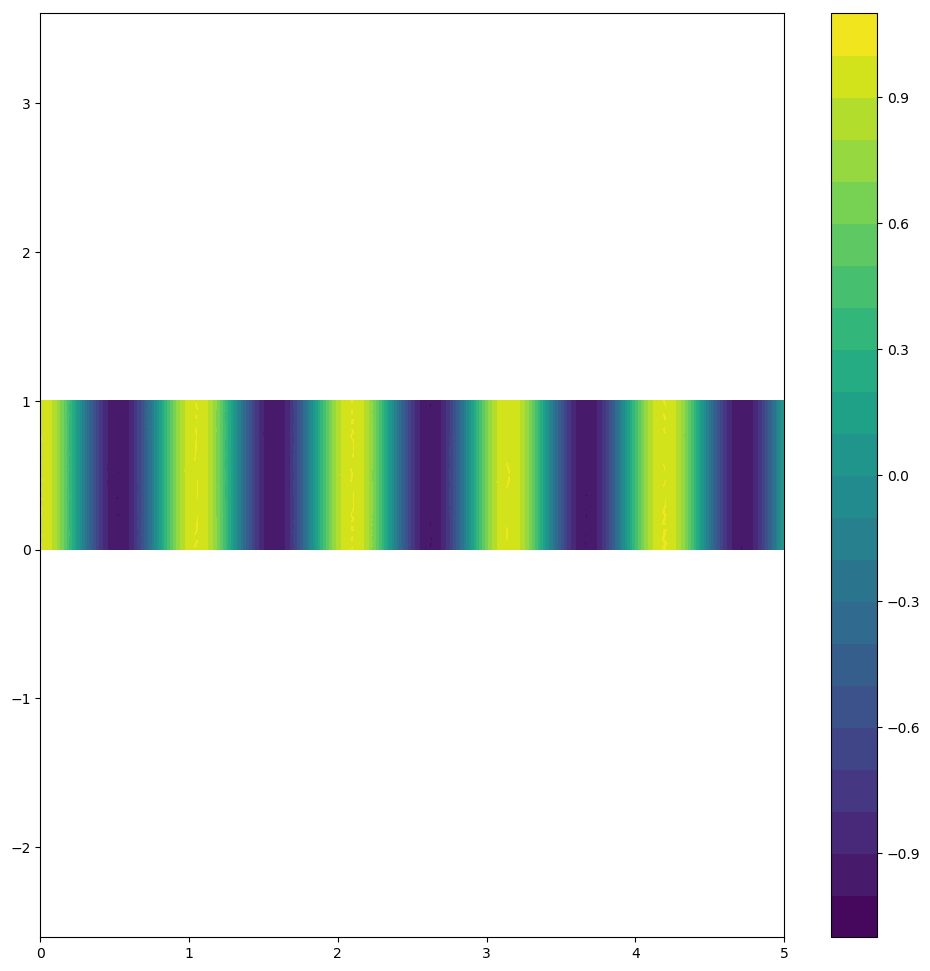

┌ Warning: `getindex(o::PyObject, s::Symbol)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o.s` instead of `o[:s]`.
│   caller = (::getfield(Main, Symbol("##3#4")){Array{Float64,2},PyObject})(::Int64) at none:0
└ @ Main .\none:0


0.9999945689090428 + 0.0im

In [5]:
pv = Float64[0 0; 5 0; 5 1; 0 1; 0 0]
p, t, e = pmesh(pv, 0.3, 3)

k = 6
ein, eout, ewall = waveguide_edges(p, t) 
K, M, Bin, Bout, bin = femhelmholtz(p, t, ein, eout)

A = K - k ^ 2 * M + im * k * (Bin + Bout)
b = 2 * im * k * bin
u = A \ b
figure(1, figsize = (12, 12))
tplot(p, t, real.(u))
colorbar()

intensity = u' * Bout * u

The result looks almost identical to the exact solution of $u(x,y)=e^{-6ix}$, and our numerical intensity of $\approx 0.9999945689090428$ is very close to $1$. Finally, we run a convergence test below by solving our BVP on various mesh refinements, using `femhelmholtz`, with `nref` ranging from $1$ to $3$. I would also run this for `nref`=$4$, but when I did so, Julia returned an out of memory error, which means that my 10-year old laptop could not handle the size of the matrices required. I apologize for this, but we will soon discover that our `nref` range still suffices to show the convergence rate. We compare our numerical solution on each successive refinement with the exact solution, which we have explicitly via the max norm.

We assume that the global error in our finite element formulation depends on the stepsize in some kind of power law, i.e. $\left||u-u_{h}|\right|_{max}\approx Ch^{p}$, where $u$ is the exact solution, $u_{h}$ is the approximate (numerical) solution, $h$ is some one-dimensional spatial quantity (say, the average spacing between neighboring nodes) and $C,p$ constants greater than zero. This is the usual error analysis for these numerical methods. Then, by plotting this max norm error as $h$ varies in a log-log plot, the slope of the resulting graph will give us $p$, because 

$$
\left||u-u_{h}|\right|_{max}\approx Ch^{p}\Rightarrow\log\left||u-u_{h}|\right|_{max}\approx \log\left(Ch^{p}\right)=\log C+\log h^{p}=\log C+p\log h.\quad(41)
$$

In our case, we can let our "spatial quantity" be $n$, which is the number of nodes in our triangular mesh as `nref` increases. This is roughly inversely proportional to the average spacing between neighboring nodes, so when we look at our loglog plot, we will get the same desired convergence plot, but with a negative correlation vs. a positive one (so the slope will be negative of what it should be). This will still work.

In [ ]:
k = 6

uexact(x) = exp.(-im * k * x)
n = 300
hx = 5 / (n - 1)
xq = hx * (0 : n - 1)
hy = 1 / (n - 1)
yq = hy * (0 : n - 1)
uexactq = ones(n) * transpose(uexact(xq))

figure(1, figsize = (6, 6))
clf()
contourf(xq, yq, real.(uexactq))
axis("equal")
title(L"u_{exact}(x, y)")
colorbar()

nrefq = 1 : 3
errors = zeros(length(nrefq))
meshsizes = zeros(length(nrefq))
pv = Float64[0 0; 5 0; 5 1; 0 1; 0 0]
for i = 1 : length(nrefq)
    p, t, e = pmesh(pv, 0.3, nrefq[i])
    ein, eout, ewall = waveguide_edges(p, t) 
    K, M, Bin, Bout, bin = femhelmholtz(p, t, ein, eout)
    A = K - k ^ 2 * M + im * k * (Bin + Bout)
    b = 2 * im * k * bin
    u = A \ b
    
    #calculate the exact solution
    n = length(p[:, 1])
    w = complex(zeros(n))
    for i = 1 : n
        x = p[i, 1]
        w[i] = uexact(x)
    end
    uactual = I \ w
    errors[i] = norm(u - uactual, Inf)
    meshsizes[i] = n
end

figure(2, figsize = (12, 12))
clf()
loglog(meshsizes, errors)
title("Convergence plot")
xlabel(L"\log(n)")
ylabel(L"\log\left||u-u_{exact}|\right|_{\infty}")

rates = @. log2(errors[end - 1, :]) - log2(errors[end, :])
print("The slope of the loglog plot (i.e. the order of convergence) is roughly p≈", rates[1, 1], ".")

By $(41)$, since the slope of this loglog plot is roughly equal in magnitude to $1.982912223487355\approx 2$, $p\approx 2$, which means that we have second-order (quadratic) convergence, as expected. No doubt, our plot looks very linear, showing that our scheme converges properly. $\boxed{}$

## Problem 3

**Part (a)**

We will use `femhelmholtz` to solve our BVP on a similar domain as defined in $(21)-(24)$, except with two slits present, $0.2$ units wide and $0.8$ units deep, centered at $x=2,3$. We start by using `pmesh` to create a mesh for our domain, which we plot below, using `hmax`$=0.2$ and `nref`$=2$.

In [ ]:
pvslits = Float64[0 0; 5 0; 5 1; 3.1 1; 3.1 0.2; 2.9 0.2; 2.9 1; 2.1 1; 2.1 0.2; 1.9 0.2; 1.9 1; 0 1; 0 0]
pslits, tslits, eslits = pmesh(pvslits, 0.2, 2)

figure(1, figsize = (6, 6))
tplot(pslits, tslits)

**Part (b)**

Next, we want to look for resonance phenomena near $k=2\pi$ as we send a wave through this waveguide, seeing physically how it interacts with these two slits. We solve our BVP for a range of wavenumbers between $k=6$ and $k=6.5$ in increments of $\Delta k=0.01$. For each wavenumber, we get the corresponding transmitted intensity $H\left(u\right)$ for our solution, which we store in `intensities`. Then, we can plot $H\left(u\right)$ vs. $k$ in a semi-log plot (so, $H\left(u\right)$ vs. $\log(k)$).

In [ ]:
kq = 6 : 0.01 : 6.5
ein, eout, ewall = waveguide_edges(pslits, tslits) 
K, M, Bin, Bout, bin = femhelmholtz(pslits, tslits, ein, eout)
N = length(kq)
intensities = zeros(N)
for i = 1 : N
    k = kq[i]
    A = K - k ^ 2 * M + im * k * (Bin + Bout)
    b = 2 * im * k * bin
    u = A \ b
    intensities[i] = real(u' * Bout * u)
end

figure(1, figsize = (6, 6))
semilogx(kq, intensities)
xlabel(L"\log(k)\quad (wavenumber)")
ylabel(L"H\left(\mathbf{u}\right)\quad (transmitted\quad intensity) ")

**Part (c)**

Next, we proceed by finding the wavenumbers which correspond to a local peak transmitted intensity and a local intensity minimum (which is actually near zero intensity), and for each of these, we can study the qualitative behavior of our wave's interaction with these two slits. This can give us a physical interpretation of how our wave behaves for the intensity to change as such.

To study this, we plot the numerical solutions `u` that correspond to each of these two wavenumbers.

In [ ]:
khigh = kq[argmax(intensities)]
klow = kq[argmin(intensities)]

ein, eout, ewall = waveguide_edges(pslits, tslits) 
K, M, Bin, Bout, bin = femhelmholtz(pslits, tslits, ein, eout)

Ahigh = K - khigh ^ 2 * M + im * khigh * (Bin + Bout)
bhigh = 2 * im * khigh * bin
uhigh = Ahigh \ bhigh

Alow = K - klow ^ 2 * M + im * klow * (Bin + Bout)
blow = 2 * im * klow * bin
ulow = Alow \ blow

figure(1, figsize = (6, 6))
tplot(pslits, tslits, real.(uhigh))
title(L"u(x,y)\quad for\quad H_{max}")
xlabel("x")
ylabel("y")
colorbar()
println("The wavenumber corresponding to the highest intensity is k≈", khigh, ".")

figure(2, figsize = (6, 6))
tplot(pslits, tslits, real.(ulow))
title(L"u(x,y)\quad for\quad H_{min}")
xlabel("x")
ylabel("y")
colorbar()
println("The wavenumber corresponding to the lowest intensity is k≈", klow, ".")

We observe that, when we had a maximum transmitted intensity (in the top graph), the bulk of the wave seems to move "around" the two slits, which means that most of the particles made it around the slit. However, in the case for minimum transmitted intensity (the bottom graph), the bulk of the wave (nearly all of it) gets trapped behind the slit. In other words, if most of the wave leaves the waveguide through the slit, very few particles will leave the waveguide at the end, as we would physically expect. $\boxed{}$

## Problem 4

**Part (a)**

We first define a new function `p2mesh` which adds edge midpoints to a given triangular mesh with, as before, nodes contained in `p` ($n\times 2$ array) and triangulation in `t` ($N\times 3$ array), where `t` contains the indices of each node in each triangular element, which correspond to the rows in `p` that contain the coordinates for these nodes. The process can be outlined like this:

1. Use `all_edges` to get all unique edges from our triangulation, the indices corresponding to boundary edges (contained in `boundary_indices`), and `emap`. `emap[it, k]` maps each edge `k` on local triangle `it` to its corresponding indices for rows in `p`.
2. We initialize `t2` by inserting columns after each of these three columns in `t`. Therefore, the first column corresponds to the first node, the second column the node between the first and second nodes, the third column the second node, etc. This ensures that the "orientation" of our triangular element is preserved for when we use 2nd-order Gauss-Legendre later again. We also set `p2`=`p` and `e2`=`e`, where `p` and `e` are the same as in the original mesh.
3. We loop through each triangular element, and then through each on that element. For each edge, we add the midpoint to `p2`, and then add the index for that midpoint to `t2`. If this edge happens to be on the boundary (which we can check using `boundary_indices`), then we add it to `e2`.
4. Return `p2`, `t2`, and `e2`. 

`p2` is the new list of nodes, containing the original mesh nodes and the newly-added midpoints, `t2` is our new local-to-global mapping for the triangular elements (each row in `t` corresponds to the same rows in `t2`, but now `t2` includes indices for the midpoints as well), and `e2` contains the indices of the boundary nodes, now including the midpoints that lie on the boundary as well.

In [ ]:
function p2mesh(p, t)
    edges, boundary_indices, emap = all_edges(t)
    tofill = zeros(Int64, length(t[:, 1]))
    t2 = [t[:, 1] tofill t[:, 2] tofill t[:, 3] tofill] #t2 will be made such that midpoints go between their neighboring points
    #This will insure that the "orientation" of each triangular element is preserved.
    #set e2 = e (i.e. the current indices for boundary nodes). We will add rows to it as we go.
    e2 = unique(edges[boundary_indices,:][:])
    #preallocate matrix for midpoints 
    pmid = zeros(1, 2)
    #set p2 equal to p. We will add rows to it as we go.
    p2 = p
    for i = 1 : length(t[:, 1])
        for k = 1 : 3
            indices = edges[emap[i, k], :] #get indices corresponding to this edge
            vertices = p[indices, :] #get coordinates for the edge
            pmid = (vertices[1, :] + vertices[2, :]) / 2 #find midpoint
            p2 = vcat(p2, transpose(pmid)) #add midpoint to `p2`
            #get index corresponding to this newly-added midpoint
            numberofpoints = length(p2[:, 1]) 
            t2[i, 2 * k] = numberofpoints #add index of newly-added midpoint to `t2`
            #check if node lies on a boundary edge
            if indices[1] ∈ edges[boundary_indices, 1] && indices[2] ∈ edges[boundary_indices, 2] || indices[1] ∈ edges[boundary_indices, 2] && indices[2] ∈ edges[boundary_indices, 1]
                e2 = vcat(e2, numberofpoints) #if so, add index of midpoint to `e2`
            end
        end
    end
    return p2, t2, e2
end

We now test `p2mesh` on the test data given in the course announcement on bCourses.

In [ ]:
p = Float64[0 0; 1 0; 0 1]
t = [1 2 3]
p2, t2, e2 = p2mesh(p,t)
display(Array(p2))
display(Array(t2))
display(Array(e2))

Our output is slightly different from that in the course announcement, but only because the order in which we have added the midpoints to each row of `t2` and to the columns of `p2` as well are different. The data is the same. We will see how this also causes differences in what our `fempoi2` outputs vs. that in the course announcement, but this only causes differences in the order of our nodes; the plots are the same.

To further confirm that our `p2mesh` works, we also test it on some arbitrary polygon (the same as in problem set 3). We plot both `p` and `p2`, and on our plot of `p2`, we label the boundary nodes in orange using `e2`.

In [ ]:
pv = Float64[0 0; 1 0; 0.5 0.5; 1 1; 0 1; 0 0]
p, t, e = pmesh(pv, 0.3, 2)

p2, t2, e2 = p2mesh(p, t)

figure(1)
scatter(p[:, 1], p[:, 2], s = 1)
title("scatter plot for p")

figure(2)
scatter(p2[:, 1], p2[:, 2], s = 1)
title("scatter plot for p2")
boundary = p2[e2, :]
scatter(boundary[:, 1], boundary[:, 2], s = 5)

**Part (b)**

We again consider the Poisson problem in two dimensions. Namely, we intend to numerically solve

$$
-\nabla^{2}u(x,y)=1\quad \forall(x,y)\in\Omega\quad(42)\\
n\cdot\nabla u=0\quad \forall(x,y)\in\Gamma_{1}\quad(43)\\
u=0\quad \forall(x,y)\in\Gamma_{2},\quad(44)
$$

where $\Gamma_{1}\cup\Gamma_{2}=\partial\Omega$ and in our code, all points on $\Gamma_{2}$ are contained in a given array `e2`. Now, we want to eventually code a finite element method which is robust, and therefore works for any *reasonable* arbitrary domain $\Omega$, and we want to be able to mix up boundary conditions as desired. 

We define the space of piecewise *quadratic* continuous functions on some arbitrary, given mesh $T_{h}$:

$$
V_{h}:=\left\{v\in C^{0}\left(\Omega\right):\left.v\right|_{K}\in\mathbb{P}_{2}\left(K\right)\hspace{0.1cm}\forall K\in T_{h}\right\}.
$$

Suppose we want some numerical grid solution solution $u_{h}$ which is a linear combination of functions in $V_{h}$. Then, multiplying both sides of $(33)$ by a test function $v\in V_{h}$ and integrating both sides over the region on which our BVP is defined,

$$
\iint_{\Omega}{-\left(\nabla^{2}u_{h}\right)vdA}=\iint_{\Omega}{vdA}.\quad(45)
$$

Applying Green's first identity to the lefthand side of $(45)$, we derive the Galerkin formulation:

$$
\iint_{\Omega}{\nabla u_{h}\cdot \nabla vdA}=\iint_{\Omega}{vdA}+\oint_{\partial\Omega}{v\frac{\partial u_{h}}{\partial n}ds}=\iint_{\Omega}{vdA}+\oint_{\partial\Omega}{vn\cdot\nabla uds}=\iint_{\Omega}{vdA}+0\Rightarrow\boxed{\iint_{\Omega}{\nabla u_{h}\cdot\nabla vdA}=\iint_{\Omega}{vdA}}.\quad(46)
$$

Next, suppose that we have chosen a basis for $V_{h}$, i.e. $\left\{\varphi_{i}(x,y)\right\}$. Then, since $u_{h}\in V_{h}$, $u_{h}$ can be written as a linear combination of elements in this basis, or $u_{h}=\sum_{i}{u_{hi}\varphi_{i}}$. Furthermore, note that $(46)$ must apply to any element of $V_{h}$, so consider $(46)$ for a particular test function $v_{j}\in V_{h}$. Then, substituting these back into $(46)$,

$$
\iint_{\Omega}{\nabla u_{h}\cdot\nabla vdA}=\iint_{\Omega}{\nabla\left(\sum_{i}{u_{hi}\varphi_{i}}\right)\cdot\nabla v_{j}dA},
$$

and switching the integral and sum,

$$
\iint_{\Omega}{\nabla u_{h}\cdot\nabla vdA}=\sum_{i}{u_{hi}\iint_{\Omega}{\nabla\varphi_{i}\cdot\nabla v_{j}dA}}=\boxed{\sum_{i}{u_{hi}\iint_{\Omega}{\nabla\varphi_{i}\cdot\nabla\varphi_{j}dA}}=\iint_{\Omega}{vdA}}.\quad(47)
$$

$(47)$ is in the form of a finite element formulation, and can be turned into a matrix equation of the form $A\mathbf{u}=\mathbf{b}$, where

$$
A_{ij}=u_{hi}\iint_{\Omega}{\nabla\varphi_{i}\cdot\nabla\varphi_{j}dA}\quad(48),\quad\mathbf{u}=\begin{bmatrix} u_{1} \\ \vdots \\ u_{n}\end{bmatrix}\quad(49),\quad b_{j}=\iint_{\Omega}{\varphi_{j}dA}.\quad(50)
$$

Furthermore, since our function space $V_{h}$ consists solely of piecewise *quadratic* functions, on each element, a local basis function can be written in the form $\varphi_{i}=a_{i}^{k}+b_{i}^{k}x+c_{i}^{k}y+d_{i}^{k}x^{2}+e_{i}^{k}xy+f_{i}^{k}y^{2}$ for coefficients in $\mathbb{C}$. Therefore, 

$$
\nabla\varphi_{i}=\left<b_{i}^{k}+2d_{i}^{k}x+e_{i}^{k}y,c_{i}^{k}+2f_{i}^{k}y+e_{i}^{k}x\right>=\left<\left<b_{i}^{k},2d_{i}^{k},e_{i}^{k}\right>\cdot\left<1,x,y\right>,\left<c_{i}^{k},e_{i}^{k},2f_{i}^{k}\right>\cdot\left<1,x,y\right>\right>,\quad(51)
$$

and substituting $(51)$ into $(50)$, we see that we have to, yet again, integrate a quadratic polynomial over an arbitrary triangular element. Thus, we follow the same equations and steps followed in $(35)$ to $(39)$, except applied to the equations $(48)-(50)$. Note that, for each triangular element, since each of the local basis functions are quadratic, they each have *six* unknowns, so this requires *six* local basis functions, each uniquely determined by *six* nodes for each triangular element (the three vertices and the three midpoints along each side of the triangle).

As for `femhelmholtz`, the code for `fempoi2`, which will provide us with the code that does the above, is long with many steps, so I will supply comments that explain each step in more detail.

In [ ]:
function fempoi2(p2, t2, e2) 
    n = length(p2[:, 1]) #length of u. 
    #Since u is defined on each element, we just need the number of elements (triangles) in our triangulation, which is this.
    A = zeros(n, n) #preallocate a global matrix to be stamped
    b = zeros(n) #preallocate a global load vector to be stamped
    id1 = [1; 0; 0; 0; 0; 0] #define the first standard basis vector
    id2 = [0; 1; 0; 0; 0; 0] #"" second ""
    id3 = [0; 0; 1; 0; 0; 0] #"" third ""
    id4 = [0; 0; 0; 1; 0; 0] #"" fourth ""
    id5 = [0; 0; 0; 0; 1; 0] #"" fifth ""
    id6 = [0; 0; 0; 0; 0; 1] #"" sixth ""
    for k = 1 : length(t2[:, 1])
        #locate vertices of each triangle in our triangulation
        indices = t2[k, :]
        x1 = p2[indices[1], 1] #extract x-coordinate of first vertex
        x12 = p2[indices[2], 1] #"" midpoint of first and second vertices
        x2 = p2[indices[3], 1] #"" second vertex
        x23 = p2[indices[4], 1] #"" midpoint of second and third vertices
        x3 = p2[indices[5], 1] #"" third vertex
        x31 = p2[indices[6], 1] #"" midpoint of third and first vertices
        y1 = p2[indices[1], 2] #extract y-coordinate of first vertex
        y12 = p2[indices[2], 2] #"" second vertex
        y2 = p2[indices[3], 2] #"" third vertex
        y23 = p2[indices[4], 2] #"" fourth vertex
        y3 = p2[indices[5], 2] #"" fifth vertex
        y31 = p2[indices[6], 2] #"" sixth vertex
        #Vandermonde matrix to be inverted
        V = [1 x1 y1 x1 ^ 2 x1 * y1 y1 ^ 2; 1 x12 y12 x12 ^ 2 x12 * y12 y12 ^ 2; 1 x2 y2 x2 ^ 2 x2 * y2 y2 ^ 2; 1 x23 y23 x23 ^ 2 x23 * y23 y23 ^ 2; 1 x3 y3 x3 ^ 2 x3 * y3 y3 ^ 2; 1 x31 y31 x31 ^ 2 x31 * y31 y31 ^ 2]
        area = 0.5 * abs(x1 * (y2 - y3) + x2 * (y3 - y1) + x3 * (y1 - y2))
        coeff1 = V \ id1 #get coefficient for constant part of quadratic function on local element
        coeff2 = V \ id2 #get coefficient for x term of ""
        coeff3 = V \ id3 #get coefficient for y term of ""
        coeff4 = V \ id4 #get coefficient for x ^ 2 term of ""
        coeff5 = V \ id5 #get coefficient for x * y term of ""
        coeff6 = V \ id6 #get coefficient for y ^ 2 term of ""
        
        #Calculate the entries of the elementary matrix and load vector using Gauss-Legendre 2nd-order, similar to before
        #(should be exact, by the way, because exact for quadratic integrands)
        #define mappings
        x(ξ, η) = x1 * (1 - ξ - η) + x2 * ξ + x3 * η
        y(ξ, η) = y1 * (1 - ξ - η) + y2 * ξ + y3 * η
        #quadraturep1 = [0 1 / 2]
        #quadraturep2 = [1 / 2 0]
        #quadraturep3 = [1 / 2 1 / 2]
        quad1 = [1; x(0, 1 / 2); y(0, 1 / 2)]
        quad2 = [1; x(1 / 2, 0); y(1 / 2, 0)]
        quad3 = [1; x(1 / 2, 1 / 2); y(1 / 2, 1 / 2)]
        #calculate components of the gradient vectors for each local basis function,
        #but evaluated at each of the six nodes (three vertices, three midpoints)
        quadcoeff1gradx = [coeff1[2]; 2 * coeff1[4]; coeff1[5]]
        quadcoeff1grady = [coeff1[3]; coeff1[5]; 2 * coeff1[6]]
        quadcoeff2gradx = [coeff2[2]; 2 * coeff2[4]; coeff2[5]]
        quadcoeff2grady = [coeff2[3]; coeff2[5]; 2 * coeff2[6]]
        quadcoeff3gradx = [coeff3[2]; 2 * coeff3[4]; coeff3[5]]
        quadcoeff3grady = [coeff3[3]; coeff3[5]; 2 * coeff3[6]]
        quadcoeff4gradx = [coeff4[2]; 2 * coeff4[4]; coeff4[5]]
        quadcoeff4grady = [coeff4[3]; coeff4[5]; 2 * coeff4[6]]
        quadcoeff5gradx = [coeff5[2]; 2 * coeff5[4]; coeff5[5]]
        quadcoeff5grady = [coeff5[3]; coeff5[5]; 2 * coeff5[6]]
        quadcoeff6gradx = [coeff6[2]; 2 * coeff6[4]; coeff6[5]]
        quadcoeff6grady = [coeff6[3]; coeff6[5]; 2 * coeff6[6]]
        #calculate terms to be summed for GL2
        f1quad1x = dot(quadcoeff1gradx, quad1)
        f1quad1y = dot(quadcoeff1grady, quad1)
        f1quad2x = dot(quadcoeff1gradx, quad2)
        f1quad2y = dot(quadcoeff1grady, quad2)
        f1quad3x = dot(quadcoeff1gradx, quad3)
        f1quad3y = dot(quadcoeff1grady, quad3)
        f2quad1x = dot(quadcoeff2gradx, quad1)
        f2quad1y = dot(quadcoeff2grady, quad1)
        f2quad2x = dot(quadcoeff2gradx, quad2)
        f2quad2y = dot(quadcoeff2grady, quad2)
        f2quad3x = dot(quadcoeff2gradx, quad3)
        f2quad3y = dot(quadcoeff2grady, quad3)
        f3quad1x = dot(quadcoeff3gradx, quad1)
        f3quad1y = dot(quadcoeff3grady, quad1)
        f3quad2x = dot(quadcoeff3gradx, quad2)
        f3quad2y = dot(quadcoeff3grady, quad2)
        f3quad3x = dot(quadcoeff3gradx, quad3)
        f3quad3y = dot(quadcoeff3grady, quad3)
        f4quad1x = dot(quadcoeff4gradx, quad1)
        f4quad1y = dot(quadcoeff4grady, quad1)
        f4quad2x = dot(quadcoeff4gradx, quad2)
        f4quad2y = dot(quadcoeff4grady, quad2)
        f4quad3x = dot(quadcoeff4gradx, quad3)
        f4quad3y = dot(quadcoeff4grady, quad3)
        f5quad1x = dot(quadcoeff5gradx, quad1)
        f5quad1y = dot(quadcoeff5grady, quad1)
        f5quad2x = dot(quadcoeff5gradx, quad2)
        f5quad2y = dot(quadcoeff5grady, quad2)
        f5quad3x = dot(quadcoeff5gradx, quad3)
        f5quad3y = dot(quadcoeff5grady, quad3)
        f6quad1x = dot(quadcoeff6gradx, quad1)
        f6quad1y = dot(quadcoeff6grady, quad1)
        f6quad2x = dot(quadcoeff6gradx, quad2)
        f6quad2y = dot(quadcoeff6grady, quad2)
        f6quad3x = dot(quadcoeff6gradx, quad3)
        f6quad3y = dot(quadcoeff6grady, quad3)
        #calculate each sum for GL2 (without weights, because they are the same for all)
        A_11 = f1quad1x ^ 2 + f1quad2x ^ 2 + f1quad3x ^ 2 + f1quad1y ^ 2 + f1quad2y ^ 2 + f1quad3y ^ 2
        A_12 = f1quad1x * f2quad1x + f1quad2x * f2quad2x + f1quad3x * f2quad3x + f1quad1y * f2quad1y + f1quad2y * f2quad2y + f1quad3y * f2quad3y
        A_13 = f1quad1x * f3quad1x + f1quad2x * f3quad2x + f1quad3x * f3quad3x + f1quad1y * f3quad1y + f1quad2y * f3quad2y + f1quad3y * f3quad3y
        A_14 = f1quad1x * f4quad1x + f1quad2x * f4quad2x + f1quad3x * f4quad3x + f1quad1y * f4quad1y + f1quad2y * f4quad2y + f1quad3y * f4quad3y
        A_15 = f1quad1x * f5quad1x + f1quad2x * f5quad2x + f1quad3x * f5quad3x + f1quad1y * f5quad1y + f1quad2y * f5quad2y + f1quad3y * f5quad3y
        A_16 = f1quad1x * f6quad1x + f1quad2x * f6quad2x + f1quad3x * f6quad3x + f1quad1y * f6quad1y + f1quad2y * f6quad2y + f1quad3y * f6quad3y
        A_22 = f2quad1x ^ 2 + f2quad2x ^ 2 + f2quad3x ^ 2 + f2quad1y ^ 2 + f2quad2y ^ 2 + f2quad3y ^ 2
        A_23 = f2quad1x * f3quad1x + f2quad2x * f3quad2x + f2quad3x * f3quad3x + f2quad1y * f3quad1y + f2quad2y * f3quad2y + f2quad3y * f3quad3y
        A_24 = f2quad1x * f4quad1x + f2quad2x * f4quad2x + f2quad3x * f4quad3x + f2quad1y * f4quad1y + f2quad2y * f4quad2y + f2quad3y * f4quad3y
        A_25 = f2quad1x * f5quad1x + f2quad2x * f5quad2x + f2quad3x * f5quad3x + f2quad1y * f5quad1y + f2quad2y * f5quad2y + f2quad3y * f5quad3y
        A_26 = f2quad1x * f6quad1x + f2quad2x * f6quad2x + f2quad3x * f6quad3x + f2quad1y * f6quad1y + f2quad2y * f6quad2y + f2quad3y * f6quad3y
        A_33 = f3quad1x ^ 2 + f3quad2x ^ 2 + f3quad3x ^ 2 + f3quad1y ^ 2 + f3quad2y ^ 2 + f3quad3y ^ 2
        A_34 = f3quad1x * f4quad1x + f3quad2x * f4quad2x + f3quad3x * f4quad3x + f3quad1y * f4quad1y + f3quad2y * f4quad2y + f3quad3y * f4quad3y
        A_35 = f3quad1x * f5quad1x + f3quad2x * f5quad2x + f3quad3x * f5quad3x + f3quad1y * f5quad1y + f3quad2y * f5quad2y + f3quad3y * f5quad3y
        A_36 = f3quad1x * f6quad1x + f3quad2x * f6quad2x + f3quad3x * f6quad3x + f3quad1y * f6quad1y + f3quad2y * f6quad2y + f3quad3y * f6quad3y
        A_44 = f4quad1x ^ 2 + f4quad2x ^ 2 + f4quad3x ^ 2 + f4quad1y ^ 2 + f4quad2y ^ 2 + f4quad3y ^ 2
        A_45 = f4quad1x * f5quad1x + f4quad2x * f5quad2x + f4quad3x * f5quad3x + f4quad1y * f5quad1y + f4quad2y * f5quad2y + f4quad3y * f5quad3y
        A_46 = f4quad1x * f6quad1x + f4quad2x * f6quad2x + f4quad3x * f6quad3x + f4quad1y * f6quad1y + f4quad2y * f6quad2y + f4quad3y * f6quad3y
        A_55 = f5quad1x ^ 2 + f5quad2x ^ 2 + f5quad3x ^ 2 + f5quad1y ^ 2 + f5quad2y ^ 2 + f5quad3y ^ 2        
        A_56 = f5quad1x * f6quad1x + f5quad2x * f6quad2x + f5quad3x * f6quad3x + f5quad1y * f6quad1y + f5quad2y * f6quad2y + f5quad3y * f6quad3y
        A_66 = f6quad1x ^ 2 + f6quad2x ^ 2 + f6quad3x ^ 2 + f6quad1y ^ 2 + f6quad2y ^ 2 + f6quad3y ^ 2
        #load local matrix for A
        A_k = Symmetric((area / 3) * [A_11 A_12 A_13 A_14 A_15 A_16; A_12 A_22 A_23 A_24 A_25 A_26; A_13 A_23 A_33 A_34 A_35 A_36; A_14 A_24 A_34 A_44 A_45 A_46; A_15 A_25 A_35 A_45 A_55 A_56; A_16 A_26 A_36 A_46 A_56 A_66])
        
        #run 2nd-order Gauss-Legendre quadrature again to find local matrix for b
        quadquadratic1 = [1; x(0, 1 / 2); y(0, 1 / 2); (x(0, 1 / 2)) ^ 2; x(0, 1 / 2) * y(0, 1 / 2); (y(0, 1 / 2)) ^ 2]
        quadquadratic2 = [1; x(1 / 2, 0); y(1 / 2, 0); (x(1 / 2, 0)) ^ 2; x(1 / 2, 0) * y(1 / 2, 0); (y(1 / 2, 0)) ^ 2]
        quadquadratic3 = [1; x(1 / 2, 1 / 2); y(1 / 2, 1 / 2); (x(1 / 2, 1 / 2)) ^ 2; x(1 / 2, 1 / 2) * y(1 / 2, 1 / 2); (y(1 / 2, 1 / 2)) ^ 2]
        #calculate sums for GL2, but for b_k
        b_1 = dot(coeff1, quadquadratic1 + quadquadratic2 + quadquadratic3)
        b_2 = dot(coeff2, quadquadratic1 + quadquadratic2 + quadquadratic3)
        b_3 = dot(coeff3, quadquadratic1 + quadquadratic2 + quadquadratic3)
        b_4 = dot(coeff4, quadquadratic1 + quadquadratic2 + quadquadratic3)
        b_5 = dot(coeff5, quadquadratic1 + quadquadratic2 + quadquadratic3)
        b_6 = dot(coeff6, quadquadratic1 + quadquadratic2 + quadquadratic3)
        #load local matrix for b
        b_k = (area / 3) * [b_1; b_2; b_3; b_4; b_5; b_6]
        
        #stamp elementary matrix to global matrix
        A[indices, indices] += A_k
        #stamp elementary load to global load vector
        b[indices] += b_k
    end
    #impose Dirichlet conditions on nodes in `e2`
    for i = 1 : length(e2)
        index = e2[i]
        A[index, :] = zeros(n)
        A[index, index] = 1
        b[index] = 0
    end
    #calculate global values of u
    u = A \ b
    return u
end

Before running a convergence test, we use `tplot` to test out our `fempoi2` solver on a few domains. The two we use are a unit square (`hmax`$=0.2$ and `nref`$=2$) and some arbitrary polygon with several corners (`hmax`$=0.3$ and `nref`$=1$). 

In [ ]:
pv = Float64[0 0; 1 0; 1 1; 0 1; 0 0]
p, t, e = pmesh(pv, 0.2, 2)
p2, t2, e2 = p2mesh(p, t)
u = fempoi2(p2, t2, e2) 

#homogeneous Dirichlet conditions on a unit square
figure(1)
tplot(p, t, u[1 : size(p, 1)])
colorbar()

#arbitrary polygon geometry, all homogeneous Dirichlet
pv = Float64[0 0; 2 3; 3 1; 4 3; 5 5; 4 7; 3 6; 2 5; 1 4; -1 8; -2 4; -2 0; 0 0]
p, t, e = pmesh(pv, 0.3, 1)
p2, t2, e2 = p2mesh(p, t)
u = fempoi2(p2, t2, e2) 
figure(2)
tplot(p, t, u[1 : size(p, 1)])
colorbar()

These plots qualitatively look correct, since `u` appears to take on its maximum value in both places near the "center" of each of the domains. We also compare the result produced by our `fempoi2` solver with that provided in the course announcement.

In [ ]:
p = Float64[0 0; 1 0; 0 1]
t = [1 2 3]
p2, t2, e2 = p2mesh(p,t)

n = length(p2[:, 1]) #length of u. 
#Since u is defined on each element, we just need the number of elements (triangles) in our triangulation, which is this.
A = zeros(n, n) #preallocate a global matrix to be stamped
b = zeros(n) #preallocate a global load vector to be stamped
id1 = [1; 0; 0; 0; 0; 0] #define the first standard basis vector
id2 = [0; 1; 0; 0; 0; 0] #"" second ""
id3 = [0; 0; 1; 0; 0; 0] #"" third ""
id4 = [0; 0; 0; 1; 0; 0] #"" fourth ""
id5 = [0; 0; 0; 0; 1; 0] #"" fifth ""
id6 = [0; 0; 0; 0; 0; 1] #"" sixth ""
for k = 1 : length(t2[:, 1])
    #locate vertices of each triangle in our triangulation
    indices = t2[k, :]
    x1 = p2[indices[1], 1] #extract x-coordinate of first vertex
    x12 = p2[indices[2], 1] #"" midpoint of first and second vertices
    x2 = p2[indices[3], 1] #"" second vertex
    x23 = p2[indices[4], 1] #"" midpoint of second and third vertices
    x3 = p2[indices[5], 1] #"" third vertex
    x31 = p2[indices[6], 1] #"" midpoint of third and first vertices
    y1 = p2[indices[1], 2] #extract y-coordinate of first vertex
    y12 = p2[indices[2], 2] #"" second vertex
    y2 = p2[indices[3], 2] #"" third vertex
    y23 = p2[indices[4], 2] #"" fourth vertex
    y3 = p2[indices[5], 2] #"" fifth vertex
    y31 = p2[indices[6], 2] #"" sixth vertex
    #Vandermonde matrix to be inverted
    V = [1 x1 y1 x1 ^ 2 x1 * y1 y1 ^ 2; 1 x12 y12 x12 ^ 2 x12 * y12 y12 ^ 2; 1 x2 y2 x2 ^ 2 x2 * y2 y2 ^ 2; 1 x23 y23 x23 ^ 2 x23 * y23 y23 ^ 2; 1 x3 y3 x3 ^ 2 x3 * y3 y3 ^ 2; 1 x31 y31 x31 ^ 2 x31 * y31 y31 ^ 2]
    area = 0.5 * abs(x1 * (y2 - y3) + x2 * (y3 - y1) + x3 * (y1 - y2))
    coeff1 = V \ id1 #get coefficient for constant part of quadratic function on local element
    coeff2 = V \ id2 #get coefficient for x term of ""
    coeff3 = V \ id3 #get coefficient for y term of ""
    coeff4 = V \ id4 #get coefficient for x ^ 2 term of ""
    coeff5 = V \ id5 #get coefficient for x * y term of ""
    coeff6 = V \ id6 #get coefficient for y ^ 2 term of ""

    #Calculate the entries of the elementary matrix and load vector using Gauss-Legendre 2nd-order, similar to before
    #(should be exact, by the way, because exact for quadratic integrands)
    x(ξ, η) = x1 * (1 - ξ - η) + x2 * ξ + x3 * η
    y(ξ, η) = y1 * (1 - ξ - η) + y2 * ξ + y3 * η
    #quadraturep1 = [0 1 / 2]
    #quadraturep2 = [1 / 2 0]
    #quadraturep3 = [1 / 2 1 / 2]
    quad1 = [1; x(0, 1 / 2); y(0, 1 / 2)]
    quad2 = [1; x(1 / 2, 0); y(1 / 2, 0)]
    quad3 = [1; x(1 / 2, 1 / 2); y(1 / 2, 1 / 2)]
    quadcoeff1gradx = [coeff1[2]; 2 * coeff1[4]; coeff1[5]]
    quadcoeff1grady = [coeff1[3]; coeff1[5]; 2 * coeff1[6]]
    quadcoeff2gradx = [coeff2[2]; 2 * coeff2[4]; coeff2[5]]
    quadcoeff2grady = [coeff2[3]; coeff2[5]; 2 * coeff2[6]]
    quadcoeff3gradx = [coeff3[2]; 2 * coeff3[4]; coeff3[5]]
    quadcoeff3grady = [coeff3[3]; coeff3[5]; 2 * coeff3[6]]
    quadcoeff4gradx = [coeff4[2]; 2 * coeff4[4]; coeff4[5]]
    quadcoeff4grady = [coeff4[3]; coeff4[5]; 2 * coeff4[6]]
    quadcoeff5gradx = [coeff5[2]; 2 * coeff5[4]; coeff5[5]]
    quadcoeff5grady = [coeff5[3]; coeff5[5]; 2 * coeff5[6]]
    quadcoeff6gradx = [coeff6[2]; 2 * coeff6[4]; coeff6[5]]
    quadcoeff6grady = [coeff6[3]; coeff6[5]; 2 * coeff6[6]]
    f1quad1x = dot(quadcoeff1gradx, quad1)
    f1quad1y = dot(quadcoeff1grady, quad1)
    f1quad2x = dot(quadcoeff1gradx, quad2)
    f1quad2y = dot(quadcoeff1grady, quad2)
    f1quad3x = dot(quadcoeff1gradx, quad3)
    f1quad3y = dot(quadcoeff1grady, quad3)
    f2quad1x = dot(quadcoeff2gradx, quad1)
    f2quad1y = dot(quadcoeff2grady, quad1)
    f2quad2x = dot(quadcoeff2gradx, quad2)
    f2quad2y = dot(quadcoeff2grady, quad2)
    f2quad3x = dot(quadcoeff2gradx, quad3)
    f2quad3y = dot(quadcoeff2grady, quad3)
    f3quad1x = dot(quadcoeff3gradx, quad1)
    f3quad1y = dot(quadcoeff3grady, quad1)
    f3quad2x = dot(quadcoeff3gradx, quad2)
    f3quad2y = dot(quadcoeff3grady, quad2)
    f3quad3x = dot(quadcoeff3gradx, quad3)
    f3quad3y = dot(quadcoeff3grady, quad3)
    f4quad1x = dot(quadcoeff4gradx, quad1)
    f4quad1y = dot(quadcoeff4grady, quad1)
    f4quad2x = dot(quadcoeff4gradx, quad2)
    f4quad2y = dot(quadcoeff4grady, quad2)
    f4quad3x = dot(quadcoeff4gradx, quad3)
    f4quad3y = dot(quadcoeff4grady, quad3)
    f5quad1x = dot(quadcoeff5gradx, quad1)
    f5quad1y = dot(quadcoeff5grady, quad1)
    f5quad2x = dot(quadcoeff5gradx, quad2)
    f5quad2y = dot(quadcoeff5grady, quad2)
    f5quad3x = dot(quadcoeff5gradx, quad3)
    f5quad3y = dot(quadcoeff5grady, quad3)
    f6quad1x = dot(quadcoeff6gradx, quad1)
    f6quad1y = dot(quadcoeff6grady, quad1)
    f6quad2x = dot(quadcoeff6gradx, quad2)
    f6quad2y = dot(quadcoeff6grady, quad2)
    f6quad3x = dot(quadcoeff6gradx, quad3)
    f6quad3y = dot(quadcoeff6grady, quad3)
    A_11 = f1quad1x ^ 2 + f1quad2x ^ 2 + f1quad3x ^ 2 + f1quad1y ^ 2 + f1quad2y ^ 2 + f1quad3y ^ 2
    A_12 = f1quad1x * f2quad1x + f1quad2x * f2quad2x + f1quad3x * f2quad3x + f1quad1y * f2quad1y + f1quad2y * f2quad2y + f1quad3y * f2quad3y
    A_13 = f1quad1x * f3quad1x + f1quad2x * f3quad2x + f1quad3x * f3quad3x + f1quad1y * f3quad1y + f1quad2y * f3quad2y + f1quad3y * f3quad3y
    A_14 = f1quad1x * f4quad1x + f1quad2x * f4quad2x + f1quad3x * f4quad3x + f1quad1y * f4quad1y + f1quad2y * f4quad2y + f1quad3y * f4quad3y
    A_15 = f1quad1x * f5quad1x + f1quad2x * f5quad2x + f1quad3x * f5quad3x + f1quad1y * f5quad1y + f1quad2y * f5quad2y + f1quad3y * f5quad3y
    A_16 = f1quad1x * f6quad1x + f1quad2x * f6quad2x + f1quad3x * f6quad3x + f1quad1y * f6quad1y + f1quad2y * f6quad2y + f1quad3y * f6quad3y
    A_22 = f2quad1x ^ 2 + f2quad2x ^ 2 + f2quad3x ^ 2 + f2quad1y ^ 2 + f2quad2y ^ 2 + f2quad3y ^ 2
    A_23 = f2quad1x * f3quad1x + f2quad2x * f3quad2x + f2quad3x * f3quad3x + f2quad1y * f3quad1y + f2quad2y * f3quad2y + f2quad3y * f3quad3y
    A_24 = f2quad1x * f4quad1x + f2quad2x * f4quad2x + f2quad3x * f4quad3x + f2quad1y * f4quad1y + f2quad2y * f4quad2y + f2quad3y * f4quad3y
    A_25 = f2quad1x * f5quad1x + f2quad2x * f5quad2x + f2quad3x * f5quad3x + f2quad1y * f5quad1y + f2quad2y * f5quad2y + f2quad3y * f5quad3y
    A_26 = f2quad1x * f6quad1x + f2quad2x * f6quad2x + f2quad3x * f6quad3x + f2quad1y * f6quad1y + f2quad2y * f6quad2y + f2quad3y * f6quad3y
    A_33 = f3quad1x ^ 2 + f3quad2x ^ 2 + f3quad3x ^ 2 + f3quad1y ^ 2 + f3quad2y ^ 2 + f3quad3y ^ 2
    A_34 = f3quad1x * f4quad1x + f3quad2x * f4quad2x + f3quad3x * f4quad3x + f3quad1y * f4quad1y + f3quad2y * f4quad2y + f3quad3y * f4quad3y
    A_35 = f3quad1x * f5quad1x + f3quad2x * f5quad2x + f3quad3x * f5quad3x + f3quad1y * f5quad1y + f3quad2y * f5quad2y + f3quad3y * f5quad3y
    A_36 = f3quad1x * f6quad1x + f3quad2x * f6quad2x + f3quad3x * f6quad3x + f3quad1y * f6quad1y + f3quad2y * f6quad2y + f3quad3y * f6quad3y
    A_44 = f4quad1x ^ 2 + f4quad2x ^ 2 + f4quad3x ^ 2 + f4quad1y ^ 2 + f4quad2y ^ 2 + f4quad3y ^ 2
    A_45 = f4quad1x * f5quad1x + f4quad2x * f5quad2x + f4quad3x * f5quad3x + f4quad1y * f5quad1y + f4quad2y * f5quad2y + f4quad3y * f5quad3y
    A_46 = f4quad1x * f6quad1x + f4quad2x * f6quad2x + f4quad3x * f6quad3x + f4quad1y * f6quad1y + f4quad2y * f6quad2y + f4quad3y * f6quad3y
    A_55 = f5quad1x ^ 2 + f5quad2x ^ 2 + f5quad3x ^ 2 + f5quad1y ^ 2 + f5quad2y ^ 2 + f5quad3y ^ 2        
    A_56 = f5quad1x * f6quad1x + f5quad2x * f6quad2x + f5quad3x * f6quad3x + f5quad1y * f6quad1y + f5quad2y * f6quad2y + f5quad3y * f6quad3y
    A_66 = f6quad1x ^ 2 + f6quad2x ^ 2 + f6quad3x ^ 2 + f6quad1y ^ 2 + f6quad2y ^ 2 + f6quad3y ^ 2
    A_k = Symmetric((area / 3) * [A_11 A_12 A_13 A_14 A_15 A_16; A_12 A_22 A_23 A_24 A_25 A_26; A_13 A_23 A_33 A_34 A_35 A_36; A_14 A_24 A_34 A_44 A_45 A_46; A_15 A_25 A_35 A_45 A_55 A_56; A_16 A_26 A_36 A_46 A_56 A_66])

    quadquadratic1 = [1; x(0, 1 / 2); y(0, 1 / 2); (x(0, 1 / 2)) ^ 2; x(0, 1 / 2) * y(0, 1 / 2); (y(0, 1 / 2)) ^ 2]
    quadquadratic2 = [1; x(1 / 2, 0); y(1 / 2, 0); (x(1 / 2, 0)) ^ 2; x(1 / 2, 0) * y(1 / 2, 0); (y(1 / 2, 0)) ^ 2]
    quadquadratic3 = [1; x(1 / 2, 1 / 2); y(1 / 2, 1 / 2); (x(1 / 2, 1 / 2)) ^ 2; x(1 / 2, 1 / 2) * y(1 / 2, 1 / 2); (y(1 / 2, 1 / 2)) ^ 2]
    b_1 = dot(coeff1, quadquadratic1 + quadquadratic2 + quadquadratic3)
    b_2 = dot(coeff2, quadquadratic1 + quadquadratic2 + quadquadratic3)
    b_3 = dot(coeff3, quadquadratic1 + quadquadratic2 + quadquadratic3)
    b_4 = dot(coeff4, quadquadratic1 + quadquadratic2 + quadquadratic3)
    b_5 = dot(coeff5, quadquadratic1 + quadquadratic2 + quadquadratic3)
    b_6 = dot(coeff6, quadquadratic1 + quadquadratic2 + quadquadratic3)
    b_k = (area / 3) * [b_1; b_2; b_3; b_4; b_5; b_6]

    #stamp elementary matrix to global matrix
    A[indices, indices] += A_k
    #stamp elementary load to global load vector
    b[indices] += b_k
end

display(Array(A))
display(Array(b))

The *last* two rows and the *last* two columns are flipped in our system vs. in the test data sample results. This is fine; it has to do with how we ordered our triangulation, as shown by how the *last* two entries in `p2` for our `p2mesh` results are flipped likewise. We just need to make sure that we associate the correct physical coordinates with their corresponding `u` values, and of course, we observe that these are still correctly and consistently associated with the coordinates stored in *our* ordering of `p2`.) $\boxed{}$

**Part (c)**

Finally, we run a convergence test below by solving the Poisson problem on various mesh refinements, using `fempoi2`, with `nref` ranging from $0$ to $3$. As before, I would also run this for `nref`=$4$, but when I did so, again, Julia returned an out of memory error. Thus, we consider the finest mesh (`nref`=3) as the true solution, and compare our numerical solution on each successive refinement (up to `nref`=2) with this best solution via the max norm. Otherwise, we follow the same steps as in problem 2(d).

In [ ]:
function poiconv2(pv, hmax, nrefmax)
    nref = 0 : nrefmax
    #calculate finest solution
    p, t, e = pmesh(pv, hmax, nrefmax)
    p2, t2, e2 = p2mesh(p, t)
    ufinest = fempoi2(p2, t2, e2) 
    #calculate first solution to start us off with no grid refinements 
    p, t, e = pmesh(pv, hmax, 0)
    p2, t2, e2 = p2mesh(p, t)
    ublurry = fempoi2(p2, t2, e2) 
    #set the cutoff index. 
    #Regardless of how many times we have refined, up to this index, the u values will correspond to the same grid points.
    cutoff = length(ublurry)
    #truncate the finest solution for u (approximately the exact solution) for the grid points that are shared with the
    #solution corresponding to no refinements
    ufinestforcomparison = ufinest[1 : cutoff]
    #preallocate vector, in which we will store our errors
    errors = zeros(nrefmax)
    #preallocate vector, in which we will store our mesh sizes
    meshsizes= zeros(nrefmax)
    #calculate the first error between the grid solution with no refinements and the "exact" solution
    errors[1] = norm(ufinestforcomparison - ublurry, Inf)
    
    #calculate a numerical solution for successively more grid refinements, storing the error between the exact solution
    #and this one each time
    for i = 2 : length(nref) - 1
        p, t, e = pmesh(pv, hmax, nref[i])
        p2, t2, e2 = p2mesh(p, t)
        u = fempoi2(p2, t2, e2) 
        uforcomparison = u[1 : cutoff]
        errors[i] = norm(ufinestforcomparison - uforcomparison, Inf) 
        meshsizes[i] = length(u)
    end
    #return a vector of errors and the corresponding mesh size
    return errors, meshsizes
end

In [ ]:
hmax = 0.6
nrefmax = 4
pv = Float64[0 0; 1 0; 1 1; 0 1; 0 0]
errors, meshsizes = poiconv2(pv, hmax, nrefmax)
clf()
loglog(meshsizes, errors)
title("Convergence plot")
xlabel(L"\log(n)")
ylabel(L"\log\left||u-u_{exact}|\right|_{\infty}")

rates = @. log2(errors[end - 1, :]) - log2(errors[end, :])
println("The slope of the loglog plot (i.e. the order of convergence) is roughly p≈", rates[1, 1], ".")

By $(41)$, since the slope of this loglog plot is roughly equal in magnitude to $3.010757708892519\approx 3$, $p\approx 3$, which means that we have third-order (cubic) convergence, the proper order of convergence we would expect. $\boxed{}$